# **Evaluation of the Deepfake Project**
---
by Minh Truong
<br>
<br>
## **Introduction**
---

This report aims to summarize and evaluate the data given by the website on which the study was conducted on.
<br>
The objectives of this project was to:
- investigate the error rate of deepfake detection by human perception
- examine whether the age or gender has an influence on the error rate
- and how well the human performs to the deepfake detection A.I "Deepware"

In [3]:
#Source for this code is the module Wahrscheinlichkeitstheorie und Statistik

#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#Data Initialization
userdata_link = "https://raw.githubusercontent.com/xMinhx/deepfake-and-human-perception/master/Data%20Analyzation/users.csv"
classification_link = "https://raw.githubusercontent.com/xMinhx/deepfake-and-human-perception/master/Data%20Analyzation/classification_of_users.csv"

userdata = pd.read_csv(userdata_link)
classification = pd.read_csv(classification_link)

userdata = userdata.drop(columns=["session_id"])
classification = classification.drop(columns=["id","text","video_id_id", "gdrive_id", "onedrive_id"])

userdata = userdata.rename(columns={"id":"UserID", "testgroup_id":"GroupID", "age":"Age", "pixel_width":"Width", 
                           "pixel_height":"Height","fps":"Fps","gender_id":"Gender","device":"Device"})

classification = classification.rename(columns={"duration_in_sec":"Duration", "class_field_id":"Category",
                                                "difficulty_id":"Difficulty", "session_id_id":"UserID","play_pause":"Play_Pause","replay":"Replay",
                                                "fullscreen":"Fullscreen", "playback":"Playback","video_id":"Video","label_id":"Label"})

men = userdata.loc[userdata.Gender == 1]
women = userdata.loc[userdata.Gender == 2]
other = userdata.loc[userdata.Gender == 3]

# **Data description**
---
At the initialization of a user profile, the user will be assigned to one of two groups randomly. Group "1" and group "2". Group "1" receives feedback, whether their submission was correct, whereas group "2" receives no feedback at all. The data was collected using Javascript and SQL and can be separated into two major categories. 
- **User data:**
  - age
  - screen resolution
  - frames per second
  - gender
  - which test group they belong to

- **Classification**
  - frequency counts:
    - play, pause
    - replay
    - fullscreen
    - playback
  - duration watched
  - submitted text
  - category submission (manipulated or not-manipulated)
  - difficulty (how hard was it to classify the video?)
  - the video they evaluated

A short preview of the collected data can be seen below:

### **Example Data (Userdata)**

In [ ]:
userdata.head()

,UserID,Device,Age,Width,Height,Fps,Gender,GroupID
0,1,desktop,23,1920,975,60,1,2
1,2,desktop,22,1400,719,61,2,1
2,3,desktop,22,1920,975,144,1,1
3,4,desktop,24,1920,975,60,1,1
4,5,desktop,22,1238,1287,60,1,1


### **Example Data (Classification)**

In [ ]:
classification.head()

,Play_Pause,Replay,Fullscreen,Playback,Duration,Category,Difficulty,UserID,Video,Label
0,0,0,0,10,46,1,2,2,ckkuyewywx.mp4,1
1,1,0,1,0,33,2,2,2,axoygtekut.mp4,2
2,1,0,0,0,36,2,2,2,akxoopqjqz.mp4,2
3,1,0,1,0,32,2,2,2,akvmwkdyuv.mp4,2
4,1,0,1,0,32,1,2,2,dkuayagnmc.mp4,1


# **Evaluation: User participation and statistics**
---


### **User participation**

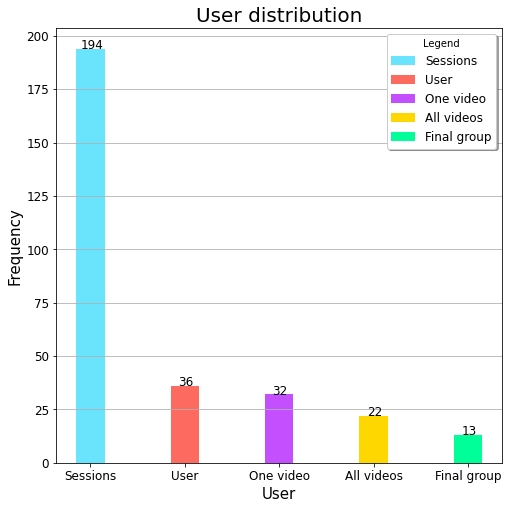

In [ ]:
#Initialization of the first data
all_session = 194
all_user = userdata.UserID.count()
all_user_atleast_one_video = userdata.loc[userdata.UserID.isin(classification.UserID)].UserID.count()
all_user_all_video = 0

#Count number of users who watched all videos
for x in userdata.UserID:
  tmp = classification.loc[classification.UserID == x]
  if(tmp.UserID.count() == 25):
    all_user_all_video +=1

#Plot for user distribution
fig, axs = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(8)


axs.bar(1,all_session, width = 0.3, label = "Sessions", color="#6ae4fc")
axs.bar(2,all_user, width = 0.3, label = "User", color="#fc6a60")
axs.bar(3,all_user_atleast_one_video, width = 0.3, label = "One video", color="#c44fff")
axs.bar(4,all_user_all_video, width = 0.3, label = "All videos", color="#FFD700")
axs.bar(5,13, width = 0.3, label = "Final group", color="#00ff99")
axs.set_xticks([1, 2, 3, 4, 5])
axs.set_xticklabels(["Sessions", "User", "One video", "All videos", "Final group"], fontsize=12)
axs.tick_params(axis="y", labelsize=12)
axs.grid(axis="y")
axs.text(0.9, all_session, str(all_session), fontsize=12)
axs.text(1.93, all_user, str(all_user), fontsize=12)
axs.text(2.93, all_user_atleast_one_video, str(all_user_atleast_one_video), fontsize=12)
axs.text(3.93, all_user_all_video, str(all_user_all_video), fontsize=12)
axs.text(4.93, 13, 13, fontsize=12)
axs.set_title("User distribution", fontsize = 20)
axs.set_ylabel("Frequency", fontsize = 15)
axs.set_xlabel("User", fontsize = 15)
_ = axs.legend(prop={'size': 12}, title = "Legend", shadow = True)

### **User statistics and properties**

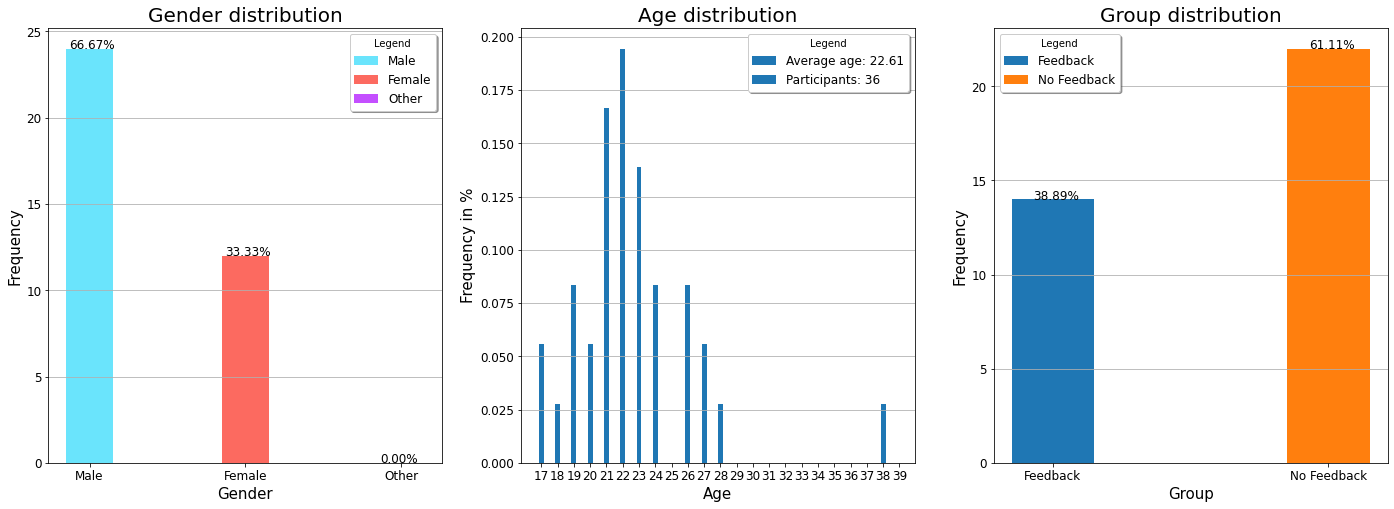

In [ ]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(24)

#Plot for gender distribution
axs[0].bar(1,men.Gender.count(), width = 0.3, label = "Male", color="#6ae4fc")
axs[0].bar(2,women.Gender.count(), width = 0.3, label = "Female", color="#fc6a60")
axs[0].bar(3,other.Gender.count(), width = 0.3, label = "Other", color="#c44fff")
axs[0].set_xticks([1, 2, 3])
axs[0].set_xticklabels(["Male", "Female", "Other"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.87, len(men.Gender), "{:.2f}".format(len(men)/len(userdata)*100) + "%", fontsize=12)
axs[0].text(1.87, len(women.Gender), "{:.2f}".format(len(women)/len(userdata)*100) + "%", fontsize=12)
axs[0].text(2.87, len(other.Gender), "{:.2f}".format(len(other)/len(userdata)*100) + "%", fontsize=12)
axs[0].set_title("Gender distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Gender", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Plot for age distribution
axs[1].hist(userdata.Age, width = 0.3, bins = np.arange(np.amin(userdata.Age), np.amax(userdata.Age)+2) , density = "True", label = "Participants")
axs[1].set_xticks(np.arange(np.amin(userdata.Age)+0.15, np.amax(userdata.Age)+2+0.15))
axs[1].set_xticklabels(np.arange(np.amin(userdata.Age), np.amax(userdata.Age)+2), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Age distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True, labels = ["Average age: " + "{:.2f}".format(sum(userdata.Age)/userdata.Age.count()), "Participants: " + str(userdata.UserID.count())])


#Plot for group distribution
group_1 = userdata.loc[userdata.GroupID == 1].UserID.count()
group_2 = userdata.loc[userdata.GroupID == 2].UserID.count()
axs[2].bar(1, group_1, width = 0.3, label = "Feedback")
axs[2].bar(2, group_2, width = 0.3, label = "No Feedback")
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["Feedback", "No Feedback"], fontsize=12)
axs[2].tick_params(axis="y", labelsize=12)
axs[2].grid(axis="y")
axs[2].text(0.93, group_1, "{:.2f}".format(group_1/(group_1+group_2)*100) + "%", fontsize=12)
axs[2].text(1.93, group_2, "{:.2f}".format(group_2/(group_1+group_2)*100) + "%", fontsize=12)
axs[2].set_title("Group distribution", fontsize = 20)
axs[2].set_ylabel("Frequency", fontsize = 15)
axs[2].set_xlabel("Group", fontsize = 15)
_ = axs[2].legend(prop={'size': 12}, title = "Legend", shadow = True)

### **User device properties**

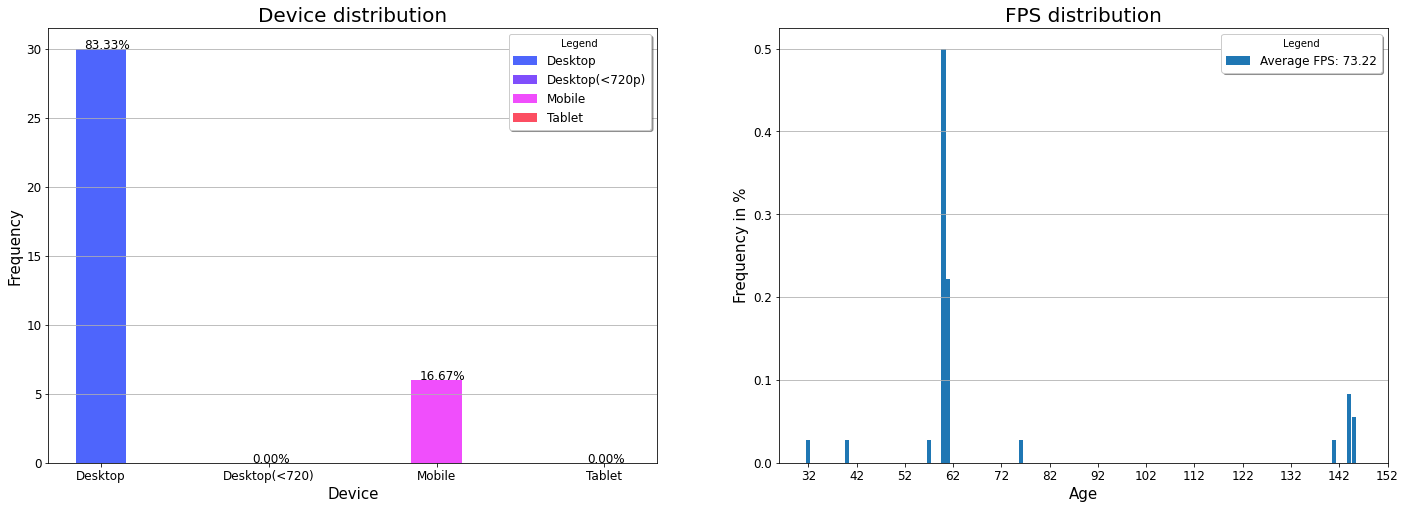

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(24)

#Intitialization of data for device distribution
desktop = userdata.loc[(userdata.Device == "desktop") & (userdata.Width >= 720)].UserID.count()
desktop2 = userdata.loc[(userdata.Device == "desktop") & (userdata.Width < 720)].UserID.count()
tablet = userdata.loc[userdata.Device == "tablet"].UserID.count()
mobile = userdata.loc[userdata.Device == "mobile"].UserID.count()
all = desktop + desktop2 + tablet + mobile

#Plot for device distribution
axs[0].bar(1, desktop, width = 0.3, label = "Desktop", color="#4e65fc")
axs[0].bar(2, desktop2, width = 0.3, label = "Desktop(<720p)", color="#7f4efc")
axs[0].bar(3, mobile, width = 0.3, label = "Mobile", color="#f04efc")
axs[0].bar(4, tablet, width = 0.3, label = "Tablet", color="#fc4e62")
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(["Desktop", "Desktop(<720)", "Mobile", "Tablet"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.9, desktop, "{:.2f}".format(desktop/all*100) + "%", fontsize=12)
axs[0].text(1.9, desktop2, "{:.2f}".format(desktop2/all*100) + "%", fontsize=12)
axs[0].text(2.9, mobile, "{:.2f}".format(mobile/all*100) + "%", fontsize=12)
axs[0].text(3.9, tablet, "{:.2f}".format(tablet/all*100) + "%", fontsize=12)
axs[0].set_title("Device distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Device", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Plot for fps distribution
axs[1].hist(userdata.Fps, rwidth = 0.85, bins = np.arange(np.amin(userdata.Fps), np.amax(userdata.Fps)+2) , density = "True", label = "Average FPS: " + "{:.2f}".format(sum(userdata.Fps)/userdata.Fps.count()))
axs[1].set_xticks(np.arange(np.amin(userdata.Fps)+0.5, np.amax(userdata.Fps)+10+0.5, 10))
axs[1].set_xticklabels(np.arange(np.amin(userdata.Fps), np.amax(userdata.Fps)+10, 10), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("FPS distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True)


# **Cleaned for: Evaluated atleast one video**

### **User statistics and properties**#


- Evaluated atleast one video:

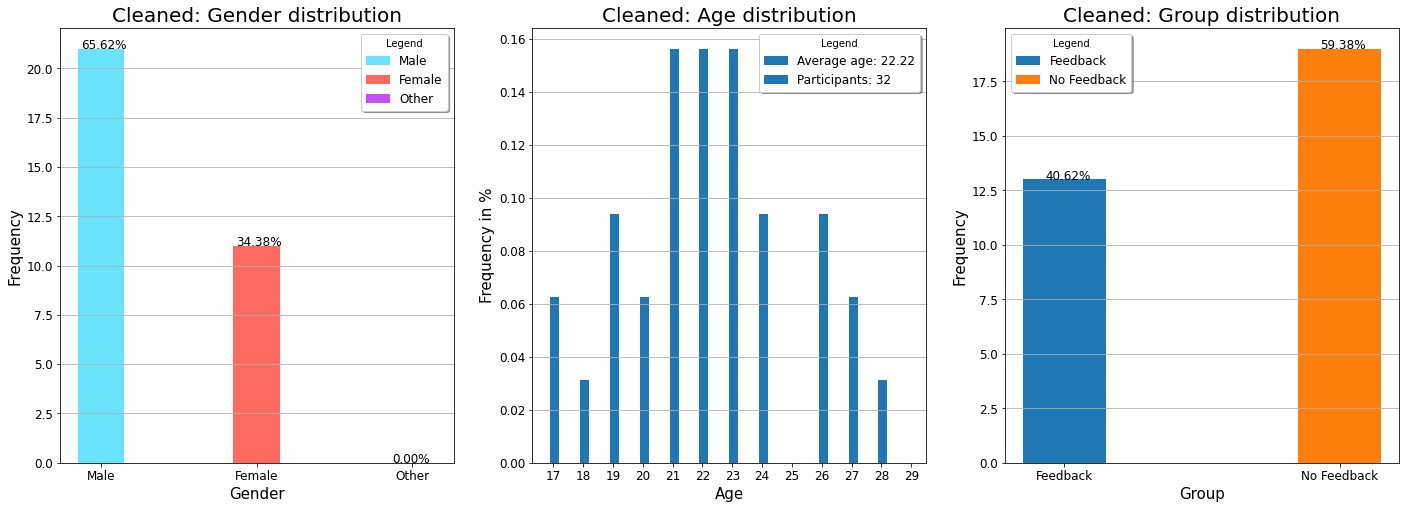

In [ ]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(24)

#Clean Data, only Users who classified atleast 1 Video
userdata_cleaned = userdata.loc[userdata.UserID.isin(classification.UserID)]
men_cleaned = userdata_cleaned.loc[userdata.Gender == 1]
women_cleaned = userdata_cleaned.loc[userdata.Gender == 2]
other_cleaned = userdata_cleaned.loc[userdata.Gender == 3]

#Cleaned - Plot for gender distribution
axs[0].bar(1,men_cleaned.Gender.count(), width = 0.3, label = "Male", color="#6ae4fc")
axs[0].bar(2,women_cleaned.Gender.count(), width = 0.3, label = "Female", color="#fc6a60")
axs[0].bar(3,other_cleaned.Gender.count(), width = 0.3, label = "Other", color="#c44fff")
axs[0].set_xticks([1, 2, 3])
axs[0].set_xticklabels(["Male", "Female", "Other"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.87, len(men_cleaned.Gender), "{:.2f}".format(len(men_cleaned)/len(userdata_cleaned)*100) + "%", fontsize=12)
axs[0].text(1.87, len(women_cleaned.Gender), "{:.2f}".format(len(women_cleaned)/len(userdata_cleaned)*100) + "%", fontsize=12)
axs[0].text(2.87, len(other_cleaned.Gender), "{:.2f}".format(len(other_cleaned)/len(userdata_cleaned)*100) + "%", fontsize=12)
axs[0].set_title("Cleaned: Gender distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Gender", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Cleaned - Plot for age distribution
axs[1].hist(userdata_cleaned.Age, width = 0.3, bins = np.arange(np.amin(userdata_cleaned.Age), np.amax(userdata_cleaned.Age)+2) , density = "True", label = "Participants")
axs[1].set_xticks(np.arange(np.amin(userdata_cleaned.Age)+0.1, np.amax(userdata_cleaned.Age)+2+0.1))
axs[1].set_xticklabels(np.arange(np.amin(userdata_cleaned.Age), np.amax(userdata_cleaned.Age)+2), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Cleaned: Age distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True, labels = ["Average age: " + "{:.2f}".format(sum(userdata_cleaned.Age)/userdata_cleaned.Age.count()), "Participants: " + str(userdata_cleaned.UserID.count())])


#Cleaned - Plot for group distribution
group_1_cleaned = userdata_cleaned.loc[userdata_cleaned.GroupID == 1].UserID.count()
group_2_cleaned = userdata_cleaned.loc[userdata_cleaned.GroupID == 2].UserID.count()
axs[2].bar(1, group_1_cleaned, width = 0.3, label = "Feedback")
axs[2].bar(2, group_2_cleaned, width = 0.3, label = "No Feedback")
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["Feedback", "No Feedback"], fontsize=12)
axs[2].tick_params(axis="y", labelsize=12)
axs[2].grid(axis="y")
axs[2].text(0.93, group_1_cleaned, "{:.2f}".format(group_1_cleaned/(userdata_cleaned.UserID.count())*100) + "%", fontsize=12)
axs[2].text(1.93, group_2_cleaned, "{:.2f}".format(group_2_cleaned/(userdata_cleaned.UserID.count())*100) + "%", fontsize=12)
axs[2].set_title("Cleaned: Group distribution", fontsize = 20)
axs[2].set_ylabel("Frequency", fontsize = 15)
axs[2].set_xlabel("Group", fontsize = 15)
_ = axs[2].legend(prop={'size': 12}, title = "Legend", shadow = True)

### **User device properties**

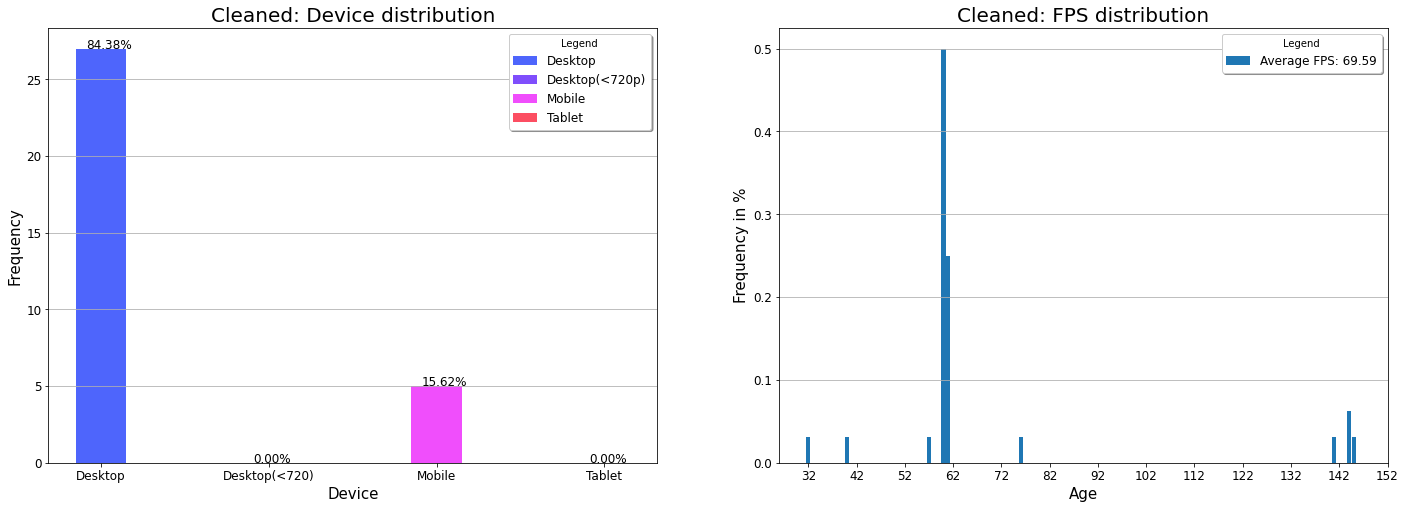

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(24)

#Cleaned - Initialization of data for device distribution
desktop_cleaned = userdata_cleaned.loc[(userdata_cleaned.Device == "desktop") & (userdata_cleaned.Width >= 720)].UserID.count()
desktop2_cleaned = userdata_cleaned.loc[(userdata_cleaned.Device == "desktop") & (userdata_cleaned.Width < 720)].UserID.count()
tablet_cleaned = userdata_cleaned.loc[userdata_cleaned.Device == "tablet"].UserID.count()
mobile_cleaned = userdata_cleaned.loc[userdata_cleaned.Device == "mobile"].UserID.count()
all_cleaned = desktop_cleaned + desktop2_cleaned + tablet_cleaned + mobile_cleaned

#Cleaned - Plot for device distribution
axs[0].bar(1, desktop_cleaned, width = 0.3, label = "Desktop", color="#4e65fc")
axs[0].bar(2, desktop2_cleaned, width = 0.3, label = "Desktop(<720p)", color="#7f4efc")
axs[0].bar(3, mobile_cleaned, width = 0.3, label = "Mobile", color="#f04efc")
axs[0].bar(4, tablet_cleaned, width = 0.3, label = "Tablet", color="#fc4e62")
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(["Desktop", "Desktop(<720)", "Mobile", "Tablet"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.91, desktop_cleaned, "{:.2f}".format(desktop_cleaned/all_cleaned*100) + "%", fontsize=12)
axs[0].text(1.91, desktop2_cleaned, "{:.2f}".format(desktop2_cleaned/all_cleaned*100) + "%", fontsize=12)
axs[0].text(2.91, mobile_cleaned, "{:.2f}".format(mobile_cleaned/all_cleaned*100) + "%", fontsize=12)
axs[0].text(3.91, tablet_cleaned, "{:.2f}".format(tablet_cleaned/all_cleaned*100) + "%", fontsize=12)
axs[0].set_title("Cleaned: Device distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Device", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Cleaned - Plot for fps distribution
axs[1].hist(userdata_cleaned.Fps, rwidth = 0.85, bins = np.arange(np.amin(userdata_cleaned.Fps), np.amax(userdata_cleaned.Fps)+2) , density = "True", label = "Average FPS: " + "{:.2f}".format(sum(userdata_cleaned.Fps)/userdata_cleaned.Fps.count()))
axs[1].set_xticks(np.arange(np.amin(userdata_cleaned.Fps)+0.5, np.amax(userdata_cleaned.Fps)+10+0.5, 10))
axs[1].set_xticklabels(np.arange(np.amin(userdata_cleaned.Fps), np.amax(userdata_cleaned.Fps)+10, 10), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Cleaned: FPS distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True)

# **Cleaned for: Evaluated atleast all videos**

### **User statistics and properties**

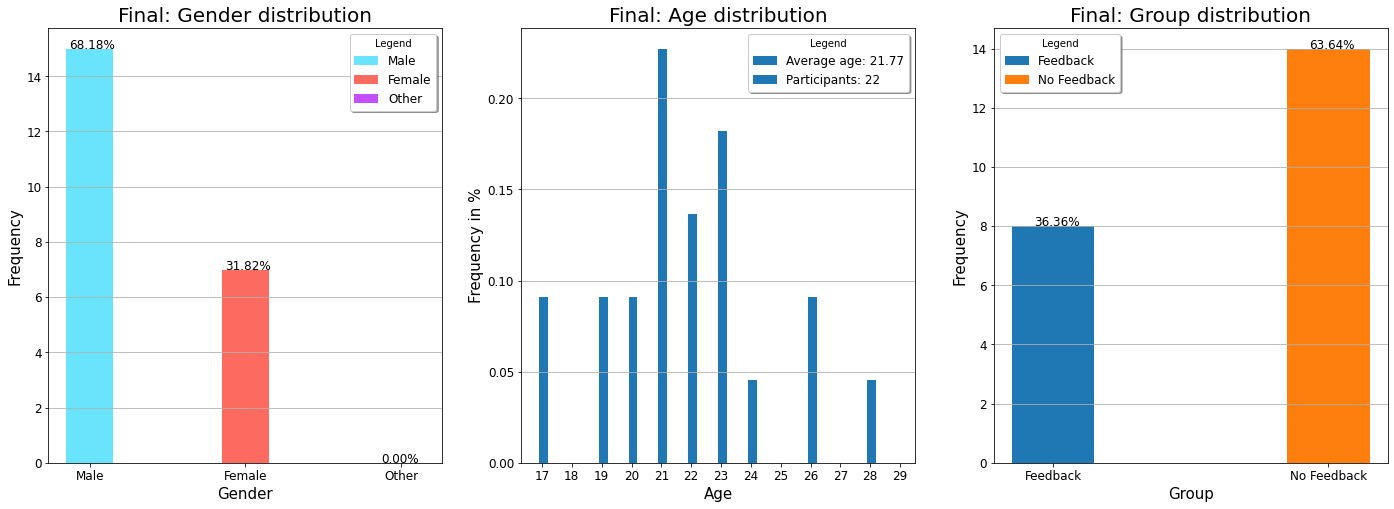

In [ ]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(24)

final_user = []
#Clean data, only Users who classified all videos
for x in userdata.UserID:
  tmp = classification.loc[classification.UserID == x]
  if(tmp.UserID.count() == 25):
    final_user.append(x)

#Cleaned 2 - Dataframe initizialization
userdata_final = userdata_cleaned.loc[userdata.UserID.isin(final_user)]
men_final = userdata_final.loc[userdata_final.Gender == 1]
women_final = userdata_final.loc[userdata_final.Gender == 2]
other_final = userdata_final.loc[userdata_final.Gender == 3]

#Cleaned 2 - Plot for gender distribution
axs[0].bar(1,men_final.Gender.count(), width = 0.3, label = "Male", color="#6ae4fc")
axs[0].bar(2,women_final.Gender.count(), width = 0.3, label = "Female", color="#fc6a60")
axs[0].bar(3,other_final.Gender.count(), width = 0.3, label = "Other", color="#c44fff")
axs[0].set_xticks([1, 2, 3])
axs[0].set_xticklabels(["Male", "Female", "Other"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.87, len(men_final.Gender), "{:.2f}".format(len(men_final)/len(userdata_final)*100) + "%", fontsize=12)
axs[0].text(1.87, len(women_final.Gender), "{:.2f}".format(len(women_final)/len(userdata_final)*100) + "%", fontsize=12)
axs[0].text(2.87, len(other_final.Gender), "{:.2f}".format(len(other_final)/len(userdata_final)*100) + "%", fontsize=12)
axs[0].set_title("Final: Gender distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Gender", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Cleaned 2- for age distribution
axs[1].hist(userdata_final.Age, width = 0.3, bins = np.arange(np.amin(userdata_final.Age), np.amax(userdata_final.Age)+2) , density = "True", label = "Participants")
axs[1].set_xticks(np.arange(np.amin(userdata_final.Age)+0.1, np.amax(userdata_final.Age)+2+0.1))
axs[1].set_xticklabels(np.arange(np.amin(userdata_final.Age), np.amax(userdata_final.Age)+2), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Final: Age distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True, labels = ["Average age: " + "{:.2f}".format(sum(userdata_final.Age)/userdata_final.Age.count()), "Participants: " + str(userdata_final.UserID.count())])


#Cleaned 2 - Plot for group distribution
group_1_final = userdata_final.loc[userdata_final.GroupID == 1].UserID.count()
group_2_final = userdata_final.loc[userdata_final.GroupID == 2].UserID.count()
axs[2].bar(1, group_1_final, width = 0.3, label = "Feedback")
axs[2].bar(2, group_2_final, width = 0.3, label = "No Feedback")
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["Feedback", "No Feedback"], fontsize=12)
axs[2].tick_params(axis="y", labelsize=12)
axs[2].grid(axis="y")
axs[2].text(0.93, group_1_final, "{:.2f}".format(group_1_final/(userdata_final.UserID.count())*100) + "%", fontsize=12)
axs[2].text(1.93, group_2_final, "{:.2f}".format(group_2_final/(userdata_final.UserID.count())*100) + "%", fontsize=12)
axs[2].set_title("Final: Group distribution", fontsize = 20)
axs[2].set_ylabel("Frequency", fontsize = 15)
axs[2].set_xlabel("Group", fontsize = 15)
_ = axs[2].legend(prop={'size': 12}, title = "Legend", shadow = True)


### **User device properties**

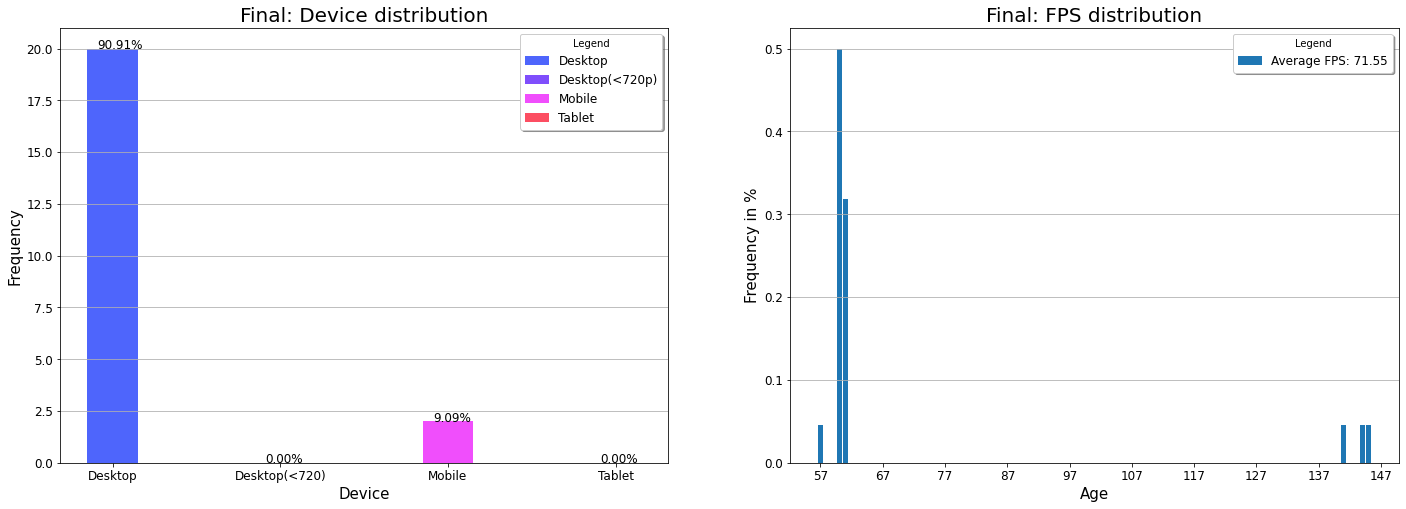

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(24)

#Cleaned 2 - Data for device distribution
desktop_final = userdata_final.loc[(userdata_final.Device == "desktop") & (userdata_final.Width >= 720)].UserID.count()
desktop2_final = userdata_final.loc[(userdata_final.Device == "desktop") & (userdata_final.Width < 720)].UserID.count()
tablet_final = userdata_final.loc[userdata_final.Device == "tablet"].UserID.count()
mobile_final = userdata_final.loc[userdata_final.Device == "mobile"].UserID.count()
all_final = desktop_final + desktop2_final + tablet_final + mobile_final

#Cleaned 2 - Plot for device distribution
axs[0].bar(1, desktop_final, width = 0.3, label = "Desktop", color="#4e65fc")
axs[0].bar(2, desktop2_final, width = 0.3, label = "Desktop(<720p)", color="#7f4efc")
axs[0].bar(3, mobile_final, width = 0.3, label = "Mobile", color="#f04efc")
axs[0].bar(4, tablet_final, width = 0.3, label = "Tablet", color="#fc4e62")
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(["Desktop", "Desktop(<720)", "Mobile", "Tablet"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.91, desktop_final, "{:.2f}".format(desktop_final/all_final*100) + "%", fontsize=12)
axs[0].text(1.91, desktop2_final, "{:.2f}".format(desktop2_final/all_final*100) + "%", fontsize=12)
axs[0].text(2.91, mobile_final, "{:.2f}".format(mobile_final/all_final*100) + "%", fontsize=12)
axs[0].text(3.91, tablet_final, "{:.2f}".format(tablet_final/all_final*100) + "%", fontsize=12)
axs[0].set_title("Final: Device distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Device", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Cleaned - Plot for fps distribution
axs[1].hist(userdata_final.Fps, rwidth = 0.85, bins = np.arange(np.amin(userdata_final.Fps), np.amax(userdata_final.Fps)+2) , density = "True", label = "Average FPS: " + "{:.2f}".format(sum(userdata_final.Fps)/userdata_final.Fps.count()))
axs[1].set_xticks(np.arange(np.amin(userdata_final.Fps)+0.5, np.amax(userdata_final.Fps)+10+0.5, 10))
axs[1].set_xticklabels(np.arange(np.amin(userdata_final.Fps), np.amax(userdata_final.Fps)+10, 10), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Final: FPS distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True)

# **Error rate probability preview**

- Watched atleast all video - correct classification rate


### **Correct classification rate calculation**

In [ ]:
#Initizialization of lists
list_all = []
men_list = []
women_list = []
other_list = []

#Calculate the error rate of the participants and sorts them into the list
for x in userdata_final.UserID:
  classified_videos = classification.loc[classification.UserID == x]
  correct_classified = sum(np.where(classified_videos.Label == classified_videos.Category, True, False))
  correct_rate = (correct_classified/classified_videos.Video.count())
  list_all.append(correct_rate)
  if x in men_cleaned.UserID.unique():
    men_list.append(correct_rate)
  elif x in women_cleaned.UserID.unique():
    women_list.append(correct_rate)
  else:
    other_list.append(correct_rate)


### **Correct classification rate graphs**

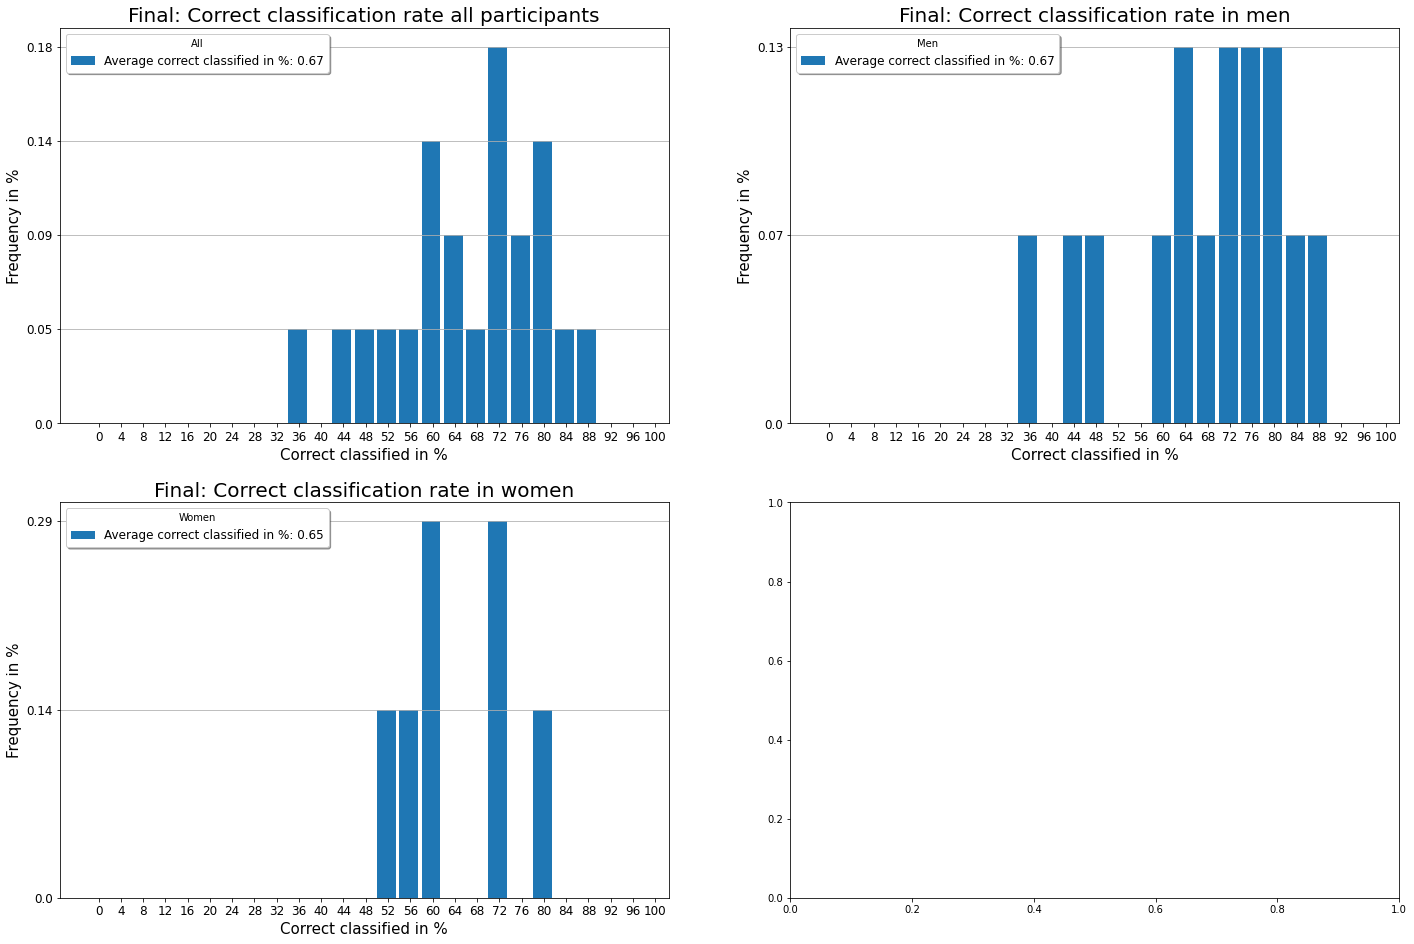

In [ ]:
#Plot error rate
fig, axs = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(24)

#Calculate yticks and ylabels
n, bins, patches = axs[0,0].hist(list_all, rwidth = 0.85, bins = np.arange(0,1.04,0.04), label = "Average correct classified in %: " + "{:.2f}".format(sum(list_all)/len(list_all)))
yticks = np.arange(0, np.amax(n)+1)
ylabel = np.round([x / len(list_all) for x in yticks],2)

#Plot for classification rate
axs[0,0].set_xticks(np.arange(0.0228, 1.04+0.0228, 0.04))
axs[0,0].set_xticklabels(np.arange(0, 104, 4), fontsize=12)
axs[0,0].set_yticks(yticks)
axs[0,0].set_yticklabels(ylabel)
axs[0,0].tick_params(axis="y", labelsize=12)
axs[0,0].grid(axis="y")
axs[0,0].set_title("Final: Correct classification rate all participants", fontsize = 20)
axs[0,0].set_ylabel("Frequency in %", fontsize = 15)
axs[0,0].set_xlabel("Correct classified in %", fontsize = 15)
_ = axs[0,0].legend(prop={'size': 12}, title = "All", shadow = True)


#Calculate yticks and ylabels
n, bins, patches = axs[0,1].hist(men_list, rwidth = 0.85, bins = np.arange(0,1.04,0.04), label = "Average correct classified in %: " + "{:.2f}".format(round(sum(men_list)/len(men_list),2)))
yticks = np.arange(0, np.amax(n)+1)
ylabel = np.around([x / len(men_list) for x in yticks],2)

#Plot for classification rate in men
axs[0,1].set_xticks(np.arange(0.0228, 1.04+0.0228, 0.04))
axs[0,1].set_xticklabels(np.arange(0, 104, 4), fontsize=12)
axs[0,1].set_yticks(yticks)
axs[0,1].set_yticklabels(ylabel)
axs[0,1].tick_params(axis="y", labelsize=12)
axs[0,1].grid(axis="y")
axs[0,1].set_title("Final: Correct classification rate in men", fontsize = 20)
axs[0,1].set_ylabel("Frequency in %", fontsize = 15)
axs[0,1].set_xlabel("Correct classified in %", fontsize = 15)
_ = axs[0,1].legend(prop={'size': 12}, title = "Men", shadow = True)


#Calculate yticks and ylabels
n, bins, patches = axs[1,0].hist(women_list, rwidth = 0.85, bins = np.arange(0,1.04,0.04), label = "Average correct classified in %: " + "{:.2f}".format(round(sum(women_list)/len(women_list),2)))
yticks = np.arange(0, np.amax(n)+1)
ylabel = np.around([x / len(women_list) for x in yticks],2)


#Plot for classification rate in women
axs[1,0].set_xticks(np.arange(0.0228, 1.04+0.0228, 0.04))
axs[1,0].set_xticklabels(np.arange(0, 104, 4), fontsize=12)
axs[1,0].set_yticks(yticks)
axs[1,0].set_yticklabels(ylabel)
axs[1,0].tick_params(axis="y", labelsize=12)
axs[1,0].grid(axis="y")
axs[1,0].set_title("Final: Correct classification rate in women", fontsize = 20)
axs[1,0].set_ylabel("Frequency in %", fontsize = 15)
axs[1,0].set_xlabel("Correct classified in %", fontsize = 15)
_ = axs[1,0].legend(prop={'size': 12}, title = "Women", shadow = True)

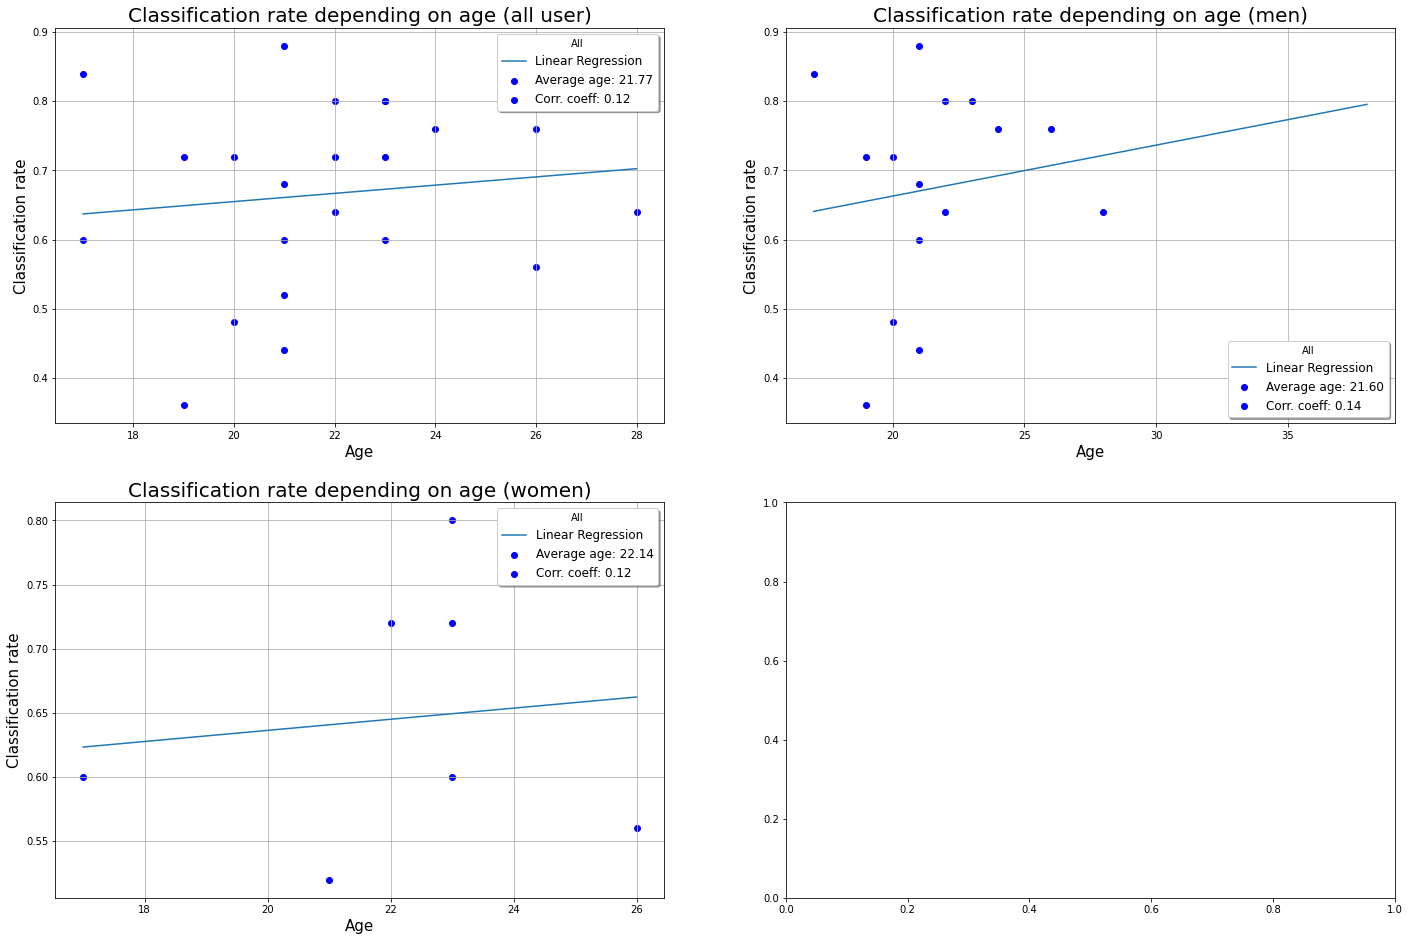

In [ ]:
#Plot error rate vs age
fig, axs = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(24)

#Plot for classification rate depending on age all user
b,a,r,p,std = stats.linregress(userdata_final.Age, list_all)
x_age = np.arange(np.amin(userdata_final.Age), np.amax(userdata_final.Age)+1)
lin_reg = [x*b+a for x in x_age]
polyreg = np.poly1d(np.polyfit(userdata_final.Age, list_all, 2))
all_pears_corr = stats.pearsonr(userdata_final.Age, list_all)
axs[0,0].scatter(userdata_final.Age, list_all, label = "Average age: "+"{:.2f}".format(sum(userdata_final.Age)/userdata_final.Age.count()), color = "blue")
axs[0,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,0].plot(x_age, lin_reg, label = "Linear Regression")
axs[0,0].set_title("Classification rate depending on age (all user)", fontsize = 20)
axs[0,0].set_ylabel("Classification rate", fontsize = 15)
axs[0,0].set_xlabel("Age", fontsize = 15)
axs[0,0].legend(prop={"size":12}, title = "All", shadow = True)
axs[0,0].grid()

#Plot for classification rate depending on age in men
b,a,r,p,std = stats.linregress(men_final.Age, men_list)
x_age = np.arange(np.amin(men_final.Age), np.amax(men.Age)+1)
lin_reg = [x*b+a for x in x_age]
polyreg = np.poly1d(np.polyfit(men_final.Age, men_list, 2))
all_pears_corr = stats.pearsonr(men_final.Age, men_list)
axs[0,1].scatter(men_final.Age, men_list, label = "Average age: "+"{:.2f}".format(sum(men_final.Age)/men_final.Age.count()), color = "blue")
axs[0,1].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,1].plot(x_age, lin_reg, label = "Linear Regression")
axs[0,1].set_title("Classification rate depending on age (men)", fontsize = 20)
axs[0,1].set_ylabel("Classification rate", fontsize = 15)
axs[0,1].set_xlabel("Age", fontsize = 15)
axs[0,1].legend(prop={"size":12}, title = "All", shadow = True)
axs[0,1].grid()

#Plot for classification rate depending on age in women
b,a,r,p,std = stats.linregress(women_final.Age, women_list)
x_age = np.arange(np.amin(women_final.Age), np.amax(women.Age)+1)
lin_reg = [x*b+a for x in x_age]
polyreg = np.poly1d(np.polyfit(women_final.Age, women_list, 2))
all_pears_corr = stats.pearsonr(women_final.Age, women_list)
axs[1,0].scatter(women_final.Age, women_list, label = "Average age: "+"{:.2f}".format(sum(women_final.Age)/women_final.Age.count()), color = "blue")
axs[1,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[1,0].plot(x_age, lin_reg, label = "Linear Regression")
axs[1,0].set_title("Classification rate depending on age (women)", fontsize = 20)
axs[1,0].set_ylabel("Classification rate", fontsize = 15)
axs[1,0].set_xlabel("Age", fontsize = 15)
axs[1,0].legend(prop={"size":12}, title = "All", shadow = True)
axs[1,0].grid()

# **Cleaned for unqualified submission**

- All submission, who hasn't completely seen the video has been removed 

### **User statistics, properties, devices and additional infos**

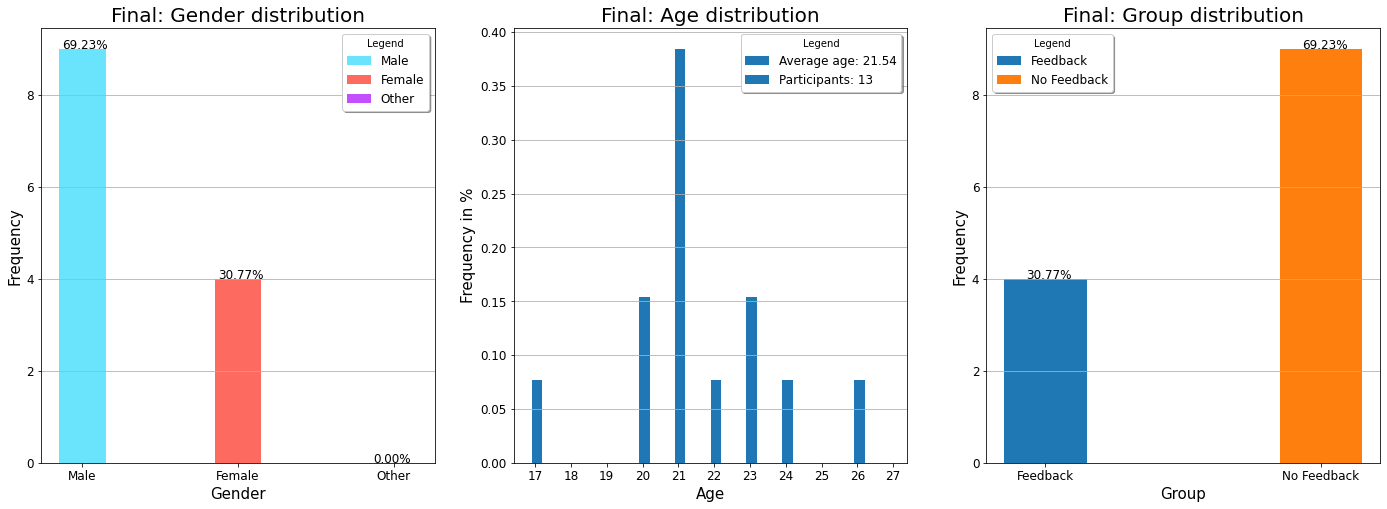

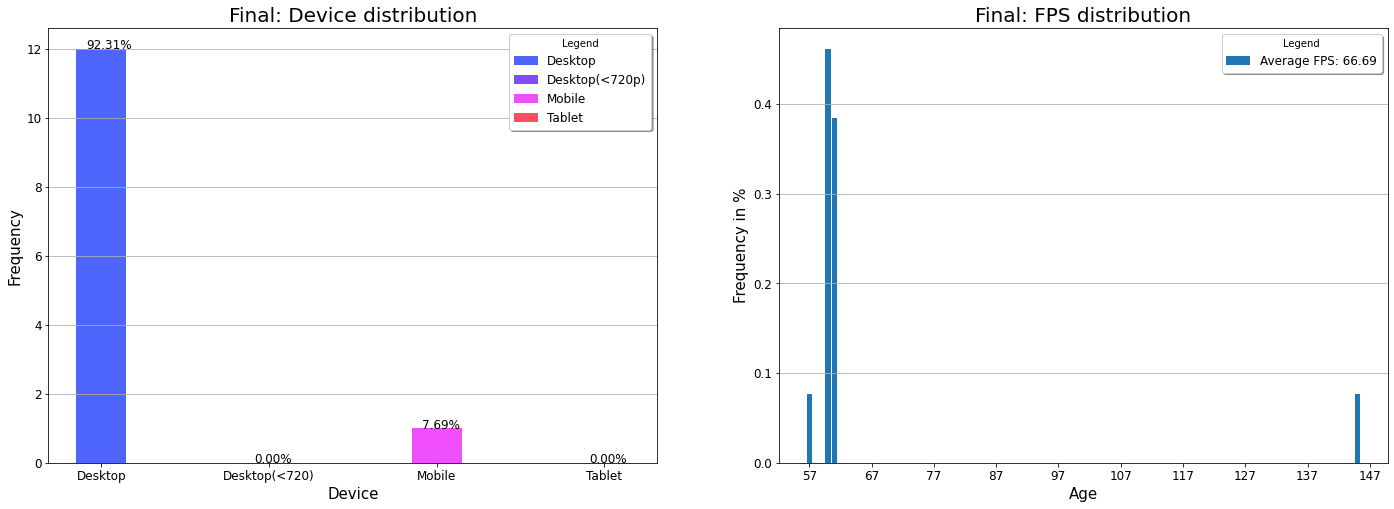

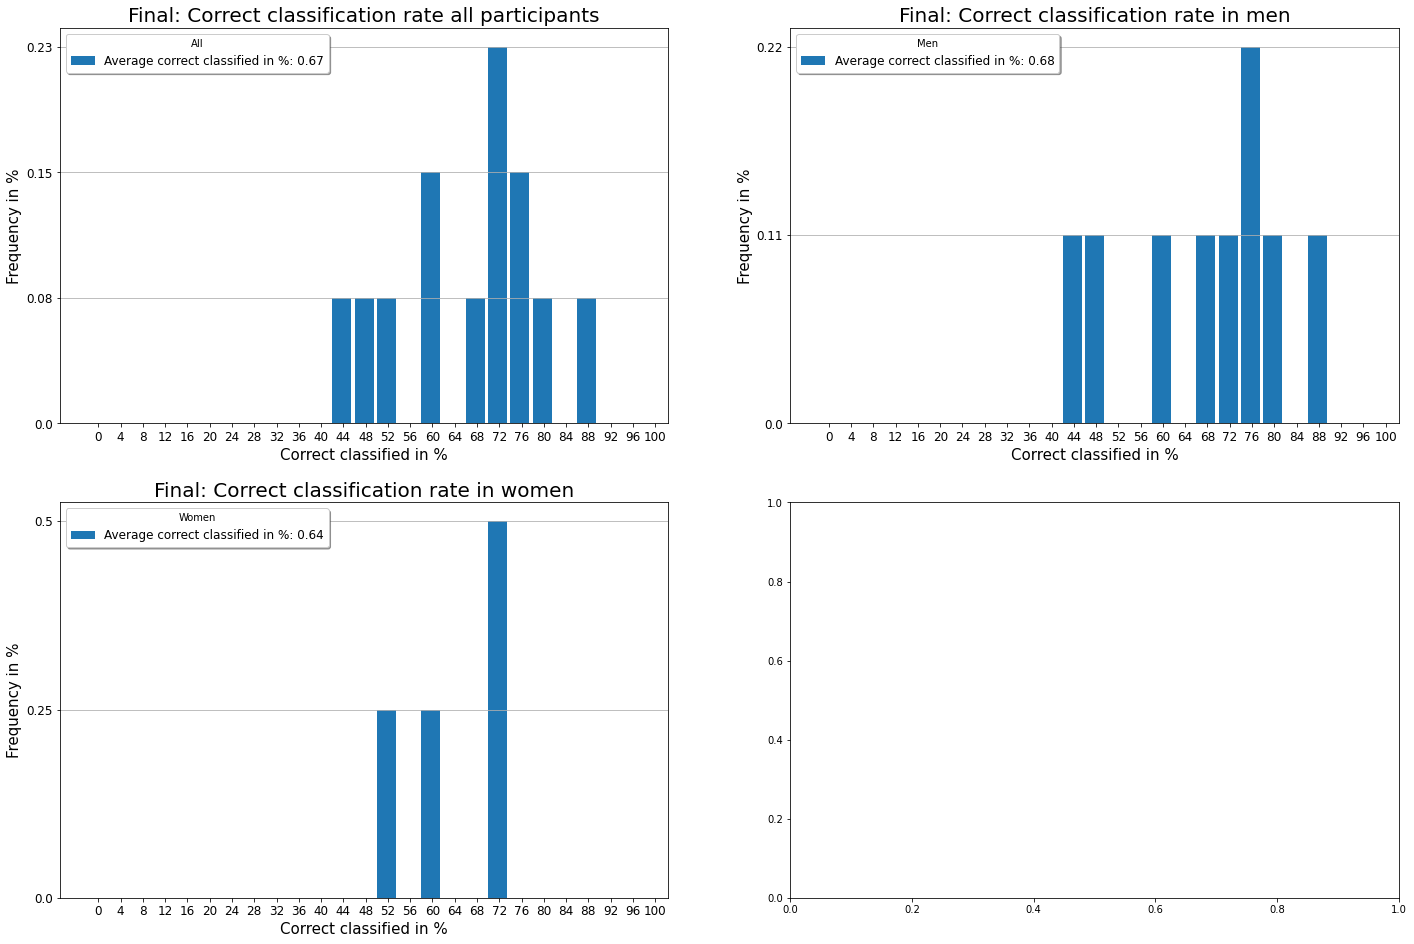

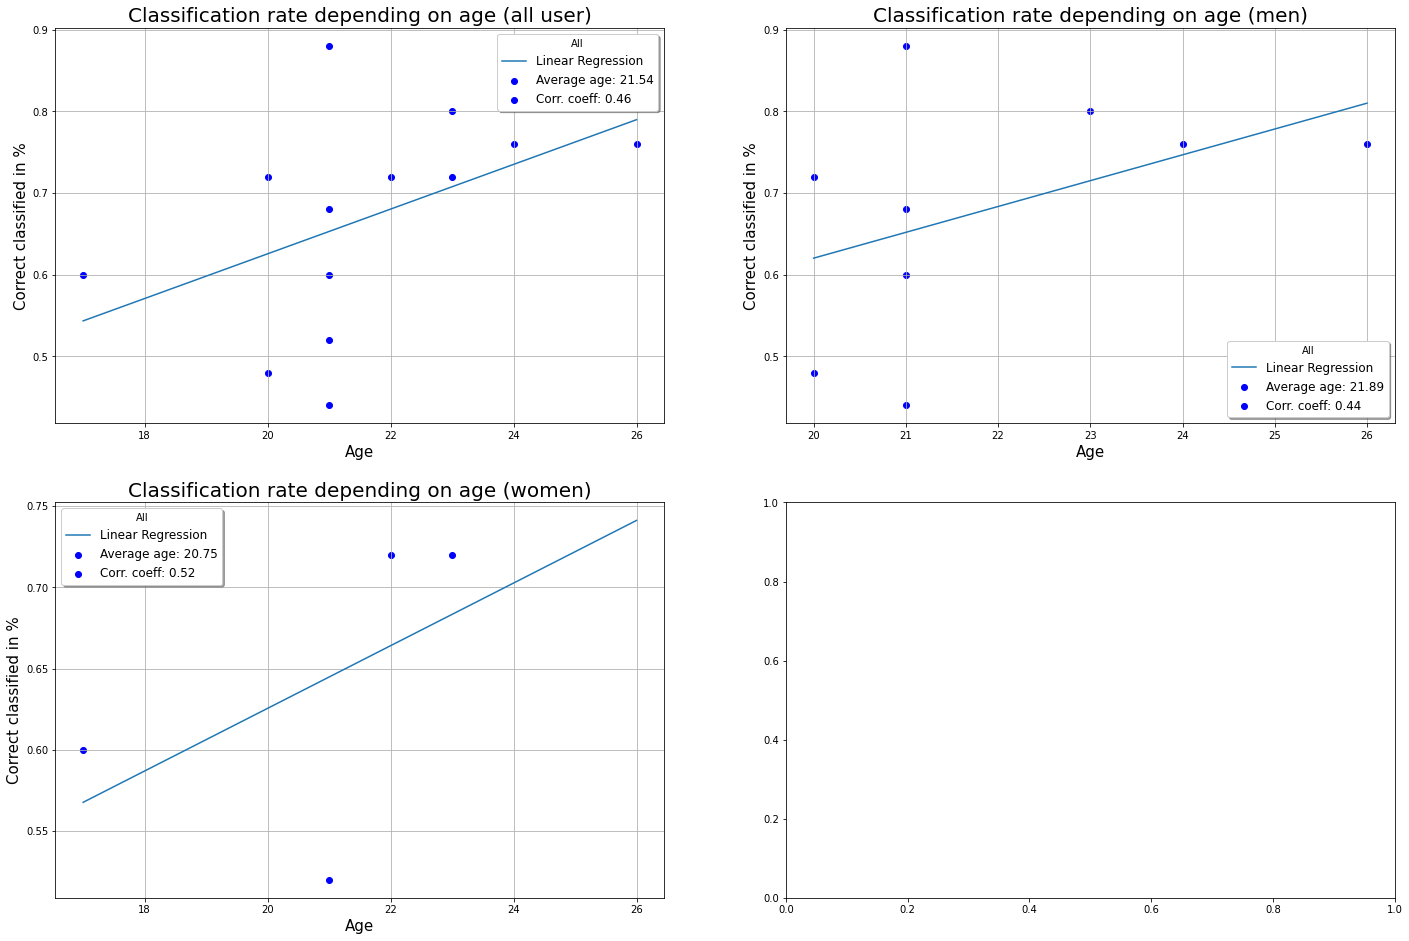

In [ ]:
final_user = []
#Clean data, only Users who classified all videos and watched the video atleast once completly
for x in userdata_final.UserID:
  tmp = classification.loc[classification.UserID == x]
  count = 0
  for y in tmp.Duration.to_numpy():
    if y >= 10:
      count += 1
  if count == 25:
    final_user.append(x)
    

#Final dataframe initialization
userdata_final = userdata_cleaned.loc[userdata.UserID.isin(final_user)]
men_final = userdata_final.loc[userdata_final.Gender == 1]
women_final = userdata_final.loc[userdata_final.Gender == 2]
other_final = userdata_final.loc[userdata_final.Gender == 3]

fig, axs = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(24)

#Final - Plot for gender distribution
axs[0].bar(1,men_final.Gender.count(), width = 0.3, label = "Male", color="#6ae4fc")
axs[0].bar(2,women_final.Gender.count(), width = 0.3, label = "Female", color="#fc6a60")
axs[0].bar(3,other_final.Gender.count(), width = 0.3, label = "Other", color="#c44fff")
axs[0].set_xticks([1, 2, 3])
axs[0].set_xticklabels(["Male", "Female", "Other"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.87, len(men_final.Gender), "{:.2f}".format(len(men_final)/len(userdata_final)*100) + "%", fontsize=12)
axs[0].text(1.87, len(women_final.Gender), "{:.2f}".format(len(women_final)/len(userdata_final)*100) + "%", fontsize=12)
axs[0].text(2.87, len(other_final.Gender), "{:.2f}".format(len(other_final)/len(userdata_final)*100) + "%", fontsize=12)
axs[0].set_title("Final: Gender distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Gender", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Final - Plot for age distribution
axs[1].hist(userdata_final.Age, width = 0.3, bins = np.arange(np.amin(userdata_final.Age), np.amax(userdata_final.Age)+2) , density = "True", label = "Participants")
axs[1].set_xticks(np.arange(np.amin(userdata_final.Age)+0.1, np.amax(userdata_final.Age)+2+0.1))
axs[1].set_xticklabels(np.arange(np.amin(userdata_final.Age), np.amax(userdata_final.Age)+2), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Final: Age distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True, labels = ["Average age: " + "{:.2f}".format(sum(userdata_final.Age)/userdata_final.Age.count()), "Participants: " + str(userdata_final.UserID.count())])


#Final - Plot for group distribution
group_1_final = userdata_final.loc[userdata_final.GroupID == 1].UserID.count()
group_2_final = userdata_final.loc[userdata_final.GroupID == 2].UserID.count()
axs[2].bar(1, group_1_final, width = 0.3, label = "Feedback")
axs[2].bar(2, group_2_final, width = 0.3, label = "No Feedback")
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["Feedback", "No Feedback"], fontsize=12)
axs[2].tick_params(axis="y", labelsize=12)
axs[2].grid(axis="y")
axs[2].text(0.93, group_1_final, "{:.2f}".format(group_1_final/(userdata_final.UserID.count())*100) + "%", fontsize=12)
axs[2].text(1.93, group_2_final, "{:.2f}".format(group_2_final/(userdata_final.UserID.count())*100) + "%", fontsize=12)
axs[2].set_title("Final: Group distribution", fontsize = 20)
axs[2].set_ylabel("Frequency", fontsize = 15)
axs[2].set_xlabel("Group", fontsize = 15)
_ = axs[2].legend(prop={'size': 12}, title = "Legend", shadow = True)


fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(24)

#Final - Data initialization for device distribution
desktop_final = userdata_final.loc[(userdata_final.Device == "desktop") & (userdata_final.Width >= 720)].UserID.count()
desktop2_final = userdata_final.loc[(userdata_final.Device == "desktop") & (userdata_final.Width < 720)].UserID.count()
tablet_final = userdata_final.loc[userdata_final.Device == "tablet"].UserID.count()
mobile_final = userdata_final.loc[userdata_final.Device == "mobile"].UserID.count()
all_final = desktop_final + desktop2_final + tablet_final + mobile_final

#Final - Plot for device distribution
axs[0].bar(1, desktop_final, width = 0.3, label = "Desktop", color="#4e65fc")
axs[0].bar(2, desktop2_final, width = 0.3, label = "Desktop(<720p)", color="#7f4efc")
axs[0].bar(3, mobile_final, width = 0.3, label = "Mobile", color="#f04efc")
axs[0].bar(4, tablet_final, width = 0.3, label = "Tablet", color="#fc4e62")
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(["Desktop", "Desktop(<720)", "Mobile", "Tablet"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.91, desktop_final, "{:.2f}".format(desktop_final/all_final*100) + "%", fontsize=12)
axs[0].text(1.91, desktop2_final, "{:.2f}".format(desktop2_final/all_final*100) + "%", fontsize=12)
axs[0].text(2.91, mobile_final, "{:.2f}".format(mobile_final/all_final*100) + "%", fontsize=12)
axs[0].text(3.91, tablet_final, "{:.2f}".format(tablet_final/all_final*100) + "%", fontsize=12)
axs[0].set_title("Final: Device distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Device", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Final Plot for fps distribution
axs[1].hist(userdata_final.Fps, rwidth = 0.85, bins = np.arange(np.amin(userdata_final.Fps), np.amax(userdata_final.Fps)+2) , density = "True", label = "Average FPS: " + "{:.2f}".format(sum(userdata_final.Fps)/userdata_final.Fps.count()))
axs[1].set_xticks(np.arange(np.amin(userdata_final.Fps)+0.5, np.amax(userdata_final.Fps)+10+0.5, 10))
axs[1].set_xticklabels(np.arange(np.amin(userdata_final.Fps), np.amax(userdata_final.Fps)+10, 10), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Final: FPS distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True)


list_all = []
men_list = []
women_list = []
other_list = []

#Calculate classification rate of new dataframe

for x in userdata_final.UserID:
  classified_videos = classification.loc[classification.UserID == x]
  correct_classified = sum(np.where(classified_videos.Label == classified_videos.Category, True, False))
  correct_rate = (correct_classified/classified_videos.Video.count())
  list_all.append(correct_rate)
  if x in men_cleaned.UserID.unique():
    men_list.append(correct_rate)
  elif x in women_cleaned.UserID.unique():
    women_list.append(correct_rate)
  else:
    other_list.append(correct_rate)


#Plot error rate
fig, axs = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(24)

#Calculate yticks and ylabels
n, bins, patches = axs[0,0].hist(list_all, rwidth = 0.85, bins = np.arange(0,1.04,0.04), label = "Average correct classified in %: " + "{:.2f}".format(sum(list_all)/len(list_all)))
yticks = np.arange(0, np.amax(n)+1)
ylabel = np.round([x / len(list_all) for x in yticks],2)

#Final - Plot for classification rate all participants
axs[0,0].set_xticks(np.arange(0.0228, 1.04+0.0228, 0.04))
axs[0,0].set_xticklabels(np.arange(0, 104, 4), fontsize=12)
axs[0,0].set_yticks(yticks)
axs[0,0].set_yticklabels(ylabel)
axs[0,0].tick_params(axis="y", labelsize=12)
axs[0,0].grid(axis="y")
axs[0,0].set_title("Final: Correct classification rate all participants", fontsize = 20)
axs[0,0].set_ylabel("Frequency in %", fontsize = 15)
axs[0,0].set_xlabel("Correct classified in %", fontsize = 15)
_ = axs[0,0].legend(prop={'size': 12}, title = "All", shadow = True)


#Calculate yticks and ylabels
n, bins, patches = axs[0,1].hist(men_list, rwidth = 0.85, bins = np.arange(0,1.04,0.04), label = "Average correct classified in %: " + "{:.2f}".format(round(sum(men_list)/len(men_list),2)))
yticks = np.arange(0, np.amax(n)+1)
ylabel = np.around([x / len(men_list) for x in yticks],2)


#Final - Plot for classification rate in men
axs[0,1].set_xticks(np.arange(0.0228, 1.04+0.0228, 0.04))
axs[0,1].set_xticklabels(np.arange(0, 104, 4), fontsize=12)
axs[0,1].set_yticks(yticks)
axs[0,1].set_yticklabels(ylabel)
axs[0,1].tick_params(axis="y", labelsize=12)
axs[0,1].grid(axis="y")
axs[0,1].set_title("Final: Correct classification rate in men", fontsize = 20)
axs[0,1].set_ylabel("Frequency in %", fontsize = 15)
axs[0,1].set_xlabel("Correct classified in %", fontsize = 15)
_ = axs[0,1].legend(prop={'size': 12}, title = "Men", shadow = True)


#Calculate yticks and ylabels
n, bins, patches = axs[1,0].hist(women_list, rwidth = 0.85, bins = np.arange(0,1.04,0.04), label = "Average correct classified in %: " + "{:.2f}".format(round(sum(women_list)/len(women_list),2)))
yticks = np.arange(0, np.amax(n)+1)
ylabel = np.around([x / len(women_list) for x in yticks],2)

#Final - Plot for classification rate in women
axs[1,0].set_xticks(np.arange(0.0228, 1.04+0.0228, 0.04))
axs[1,0].set_xticklabels(np.arange(0, 104, 4), fontsize=12)
axs[1,0].set_yticks(yticks)
axs[1,0].set_yticklabels(ylabel)
axs[1,0].tick_params(axis="y", labelsize=12)
axs[1,0].grid(axis="y")
axs[1,0].set_title("Final: Correct classification rate in women", fontsize = 20)
axs[1,0].set_ylabel("Frequency in %", fontsize = 15)
axs[1,0].set_xlabel("Correct classified in %", fontsize = 15)
_ = axs[1,0].legend(prop={'size': 12}, title = "Women", shadow = True)


#Plot error rate depending on age
fig, axs = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(24)

#Final - Plot for classification rate depending in gender - all participants
b,a,r,p,std = stats.linregress(userdata_final.Age, list_all)
x_age = np.arange(np.amin(userdata_final.Age), np.amax(userdata_final.Age)+1)
lin_reg = [x*b+a for x in x_age]
polyreg = np.poly1d(np.polyfit(userdata_final.Age, list_all, 2))
all_pears_corr = stats.pearsonr(userdata_final.Age, list_all)
axs[0,0].scatter(userdata_final.Age, list_all, label = "Average age: "+"{:.2f}".format(sum(userdata_final.Age)/userdata_final.Age.count()), color = "blue")
axs[0,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,0].plot(x_age, lin_reg, label = "Linear Regression")
axs[0,0].set_title("Classification rate depending on age (all user)", fontsize = 20)
axs[0,0].set_ylabel("Correct classified in %", fontsize = 15)
axs[0,0].set_xlabel("Age", fontsize = 15)
axs[0,0].legend(prop={"size":12}, title = "All", shadow = True)
axs[0,0].grid()

#Final - Plot for classification rate depending in gender - men
b,a,r,p,std = stats.linregress(men_final.Age, men_list)
x_age = np.arange(np.amin(men_final.Age), np.amax(men_final.Age)+1)
lin_reg = [x*b+a for x in x_age]
polyreg = np.poly1d(np.polyfit(men_final.Age, men_list, 2))
all_pears_corr = stats.pearsonr(men_final.Age, men_list)
axs[0,1].scatter(men_final.Age, men_list, label = "Average age: "+"{:.2f}".format(sum(men_final.Age)/men_final.Age.count()), color = "blue")
axs[0,1].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,1].plot(x_age, lin_reg, label = "Linear Regression")
axs[0,1].set_title("Classification rate depending on age (men)", fontsize = 20)
axs[0,1].set_ylabel("Correct classified in %", fontsize = 15)
axs[0,1].set_xlabel("Age", fontsize = 15)
axs[0,1].legend(prop={"size":12}, title = "All", shadow = True)
axs[0,1].grid()

#Final - Plot for classification rate depending in gender - women
b,a,r,p,std = stats.linregress(women_final.Age, women_list)
x_age = np.arange(np.amin(women_final.Age), np.amax(women.Age)+1)
lin_reg = [x*b+a for x in x_age]
polyreg = np.poly1d(np.polyfit(women_final.Age, women_list, 2))
all_pears_corr = stats.pearsonr(women_final.Age, women_list)
axs[1,0].scatter(women_final.Age, women_list, label = "Average age: "+"{:.2f}".format(sum(women_final.Age)/women_final.Age.count()), color = "blue")
axs[1,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[1,0].plot(x_age, lin_reg, label = "Linear Regression")
axs[1,0].set_title("Classification rate depending on age (women)", fontsize = 20)
axs[1,0].set_ylabel("Correct classified in %", fontsize = 15)
axs[1,0].set_xlabel("Age", fontsize = 15)
axs[1,0].legend(prop={"size":12}, title = "All", shadow = True)
axs[1,0].grid()

### **Classification rate depending on Screen Resolution**

'Men average pixel height: 845.5555555555555'

'Women average pixel height: 712.75'

'===================================================================='

'Men average pixel width: 1522.888888888889'

'Women average pixel height: 1470.0'

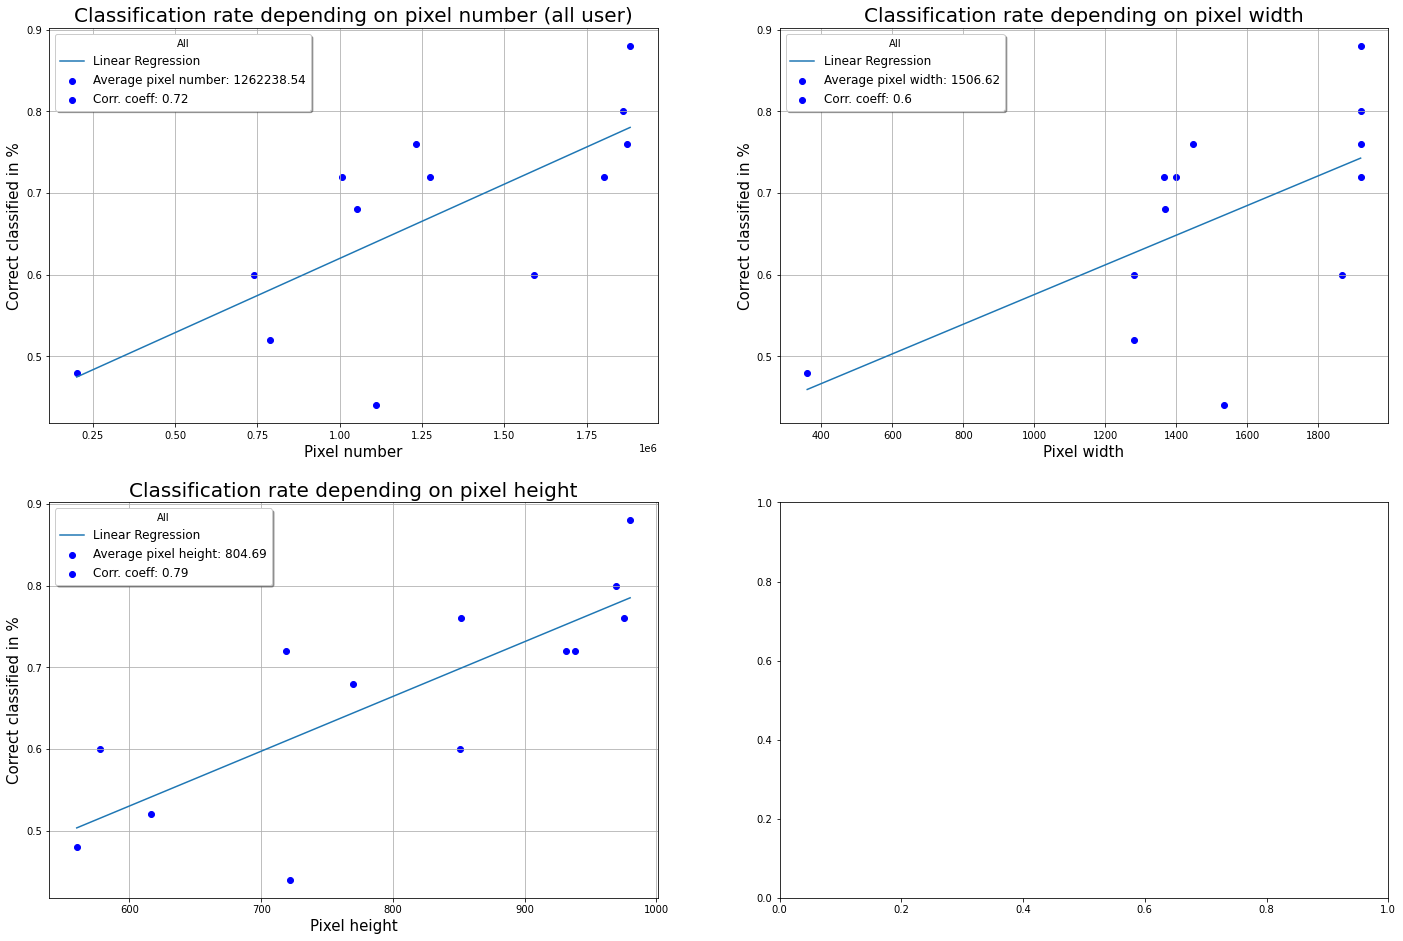

In [ ]:
width = userdata_final.Width.to_numpy()
height = userdata_final.Height.to_numpy()
screenresolution = np.multiply(width, height)

#Plot error rate vs screenresolution
fig, axs = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(24)

#Final - Plot for classification rate depending on resolution
b,a,r,p,std = stats.linregress(screenresolution, list_all)
x_screen = np.arange(np.amin(screenresolution), np.amax(screenresolution)+1)
lin_reg = [x*b+a for x in x_screen]
polyreg = np.poly1d(np.polyfit(screenresolution, list_all, 2))
all_pears_corr = stats.pearsonr(screenresolution, list_all)
axs[0,0].scatter(screenresolution, list_all, label = "Average pixel number: "+"{:.2f}".format(sum(screenresolution)/len(screenresolution)), color = "blue")
axs[0,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,0].plot(x_screen, lin_reg, label = "Linear Regression")
axs[0,0].set_title("Classification rate depending on pixel number (all user)", fontsize = 20)
axs[0,0].set_ylabel("Correct classified in %", fontsize = 15)
axs[0,0].set_xlabel("Pixel number", fontsize = 15)
axs[0,0].legend(prop={"size":12}, title = "All", shadow = True)
axs[0,0].grid()

#Plot classification rate depending on screen width
b,a,r,p,std = stats.linregress(width, list_all)
x_width = np.arange(np.amin(width), np.amax(width)+1)
lin_reg = [x*b+a for x in x_width]
polyreg = np.poly1d(np.polyfit(width, list_all, 2))
all_pears_corr = stats.pearsonr(width, list_all)
axs[0,1].scatter(width, list_all, label = "Average pixel width: "+"{:.2f}".format(sum(width)/len(width)), color = "blue")
axs[0,1].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,1].plot(x_width, lin_reg, label = "Linear Regression")
axs[0,1].set_title("Classification rate depending on pixel width", fontsize = 20)
axs[0,1].set_ylabel("Correct classified in %", fontsize = 15)
axs[0,1].set_xlabel("Pixel width", fontsize = 15)
axs[0,1].legend(prop={"size":12}, title = "All", shadow = True)
axs[0,1].grid()

#Plot classification rate depending on screen height
b,a,r,p,std = stats.linregress(height, list_all)
x_height = np.arange(np.amin(height), np.amax(height)+1)
lin_reg = [x*b+a for x in x_height]
polyreg = np.poly1d(np.polyfit(height, list_all, 2))
all_pears_corr = stats.pearsonr(height, list_all)
axs[1,0].scatter(height, list_all, label = "Average pixel height: "+"{:.2f}".format(sum(height)/len(height)), color = "blue")
axs[1,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[1,0].plot(x_height, lin_reg, label = "Linear Regression")
axs[1,0].set_title("Classification rate depending on pixel height", fontsize = 20)
axs[1,0].set_ylabel("Correct classified in %", fontsize = 15)
axs[1,0].set_xlabel("Pixel height", fontsize = 15)
axs[1,0].legend(prop={"size":12}, title = "All", shadow = True)
axs[1,0].grid()

women_width = women_final.Width.to_numpy()
women_height = women_final.Height.to_numpy()
men_width = men_final.Width.to_numpy()
men_height = men_final.Height.to_numpy()

display("Men average pixel height: " + str(sum(men_height)/len(men_height)))
display("Women average pixel height: " + str(sum(women_height)/len(women_height)))
display("====================================================================")
display("Men average pixel width: " + str(sum(men_width)/len(men_width)))
display("Women average pixel height: " + str(sum(women_width)/len(women_width)))

### **Classification rate depending on function frequency**

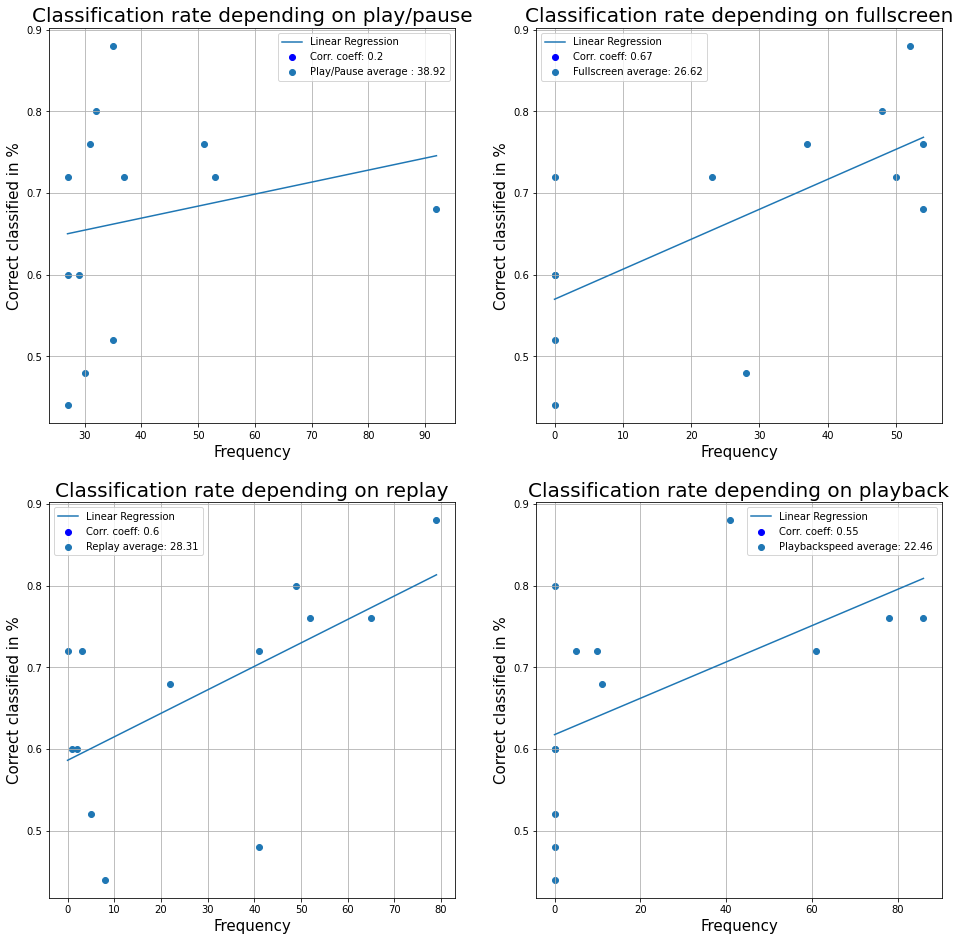

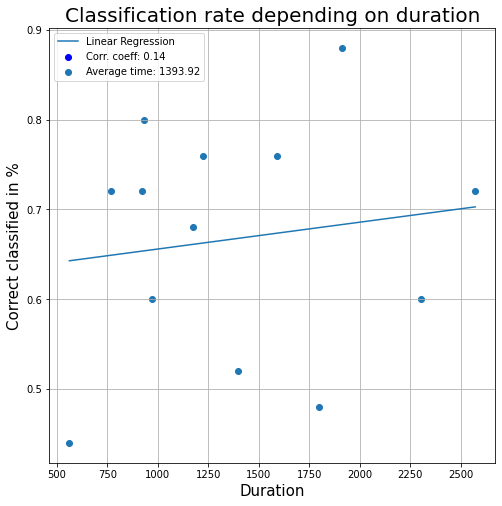

In [ ]:
play_pause = []
duration = []
fullscreen = []
replay = []
playback = []

#Calculate sum of elemen control usage for each participant
for x in userdata_final.UserID:
  tmp = classification.loc[classification.UserID == x]
  play_pause.append(sum(tmp.Play_Pause.to_numpy()))
  duration.append(sum(tmp.Duration.to_numpy()))
  fullscreen.append(sum(tmp.Fullscreen.to_numpy()))
  replay.append(sum(tmp.Replay.to_numpy()))
  playback.append(sum(tmp.Playback.to_numpy()))


fig,axs = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(16)


#Plot for classification rate depending on play/pause frequency
b,a,r,p,std = stats.linregress(play_pause, list_all)
x = np.arange(np.amin(play_pause), np.amax(play_pause)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(play_pause, list_all, 2))
all_pears_corr = stats.pearsonr(play_pause, list_all)
axs[0,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,0].plot(x, lin_reg, label = "Linear Regression")
axs[0,0].set_title("Classification rate depending on play/pause", fontsize = 20)
axs[0,0].set_ylabel("Correct classified in %", fontsize = 15)
axs[0,0].set_xlabel("Frequency", fontsize = 15)
axs[0,0].scatter(play_pause, list_all, label = "Play/Pause average : " + "{:.2f}".format(sum(play_pause)/len(play_pause)))
axs[0,0].legend()
axs[0,0].grid()

#Plot for classification rate depending on fullscreen frequency
b,a,r,p,std = stats.linregress(fullscreen, list_all)
x = np.arange(np.amin(fullscreen), np.amax(fullscreen)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(fullscreen, list_all, 2))
all_pears_corr = stats.pearsonr(fullscreen, list_all)
axs[0,1].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,1].plot(x, lin_reg, label = "Linear Regression")
axs[0,1].set_title("Classification rate depending on fullscreen", fontsize = 20)
axs[0,1].scatter(fullscreen, list_all, label = "Fullscreen average: "+ "{:.2f}".format(sum(fullscreen)/len(fullscreen)))
axs[0,1].set_ylabel("Correct classified in %", fontsize = 15)
axs[0,1].set_xlabel("Frequency", fontsize = 15)
axs[0,1].legend()
axs[0,1].grid()

#Plot for classification rate depending on replay frequency
b,a,r,p,std = stats.linregress(replay, list_all)
x = np.arange(np.amin(replay), np.amax(replay)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(replay, list_all, 2))
all_pears_corr = stats.pearsonr(replay, list_all)
axs[1,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[1,0].plot(x, lin_reg, label = "Linear Regression")
axs[1,0].set_title("Classification rate depending on replay", fontsize = 20)
axs[1,0].scatter(replay, list_all, label = "Replay average: "+ "{:.2f}".format(sum(replay)/len(replay)))
axs[1,0].set_ylabel("Correct classified in %", fontsize = 15)
axs[1,0].set_xlabel("Frequency", fontsize = 15)
axs[1,0].legend()
axs[1,0].grid()


#Plot for classification rate depending on playback frequency
b,a,r,p,std = stats.linregress(playback, list_all)
x = np.arange(np.amin(playback), np.amax(playback)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(playback, list_all, 2))
all_pears_corr = stats.pearsonr(playback, list_all)
axs[1,1].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[1,1].plot(x, lin_reg, label = "Linear Regression")
axs[1,1].set_title("Classification rate depending on playback", fontsize = 20)
axs[1,1].scatter(playback, list_all, label = "Playbackspeed average: "+ "{:.2f}".format(sum(playback)/len(playback)))
axs[1,1].set_ylabel("Correct classified in %", fontsize = 15)
axs[1,1].set_xlabel("Frequency", fontsize = 15)
axs[1,1].legend()
axs[1,1].grid()

#Plot for classification rate depending on duration
fig, axs = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(8)
axs.set_title("Classification rate depending on duration", fontsize=20)
axs.set_ylabel("Correct classified in %", fontsize = 15)
axs.set_xlabel("Duration", fontsize = 15)
b,a,r,p,std = stats.linregress(duration, list_all)
x = np.arange(np.amin(duration), np.amax(duration)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(duration, list_all, 2))
all_pears_corr = stats.pearsonr(duration, list_all)
axs.scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs.plot(x, lin_reg, label = "Linear Regression")
axs.grid()
axs.scatter(duration,list_all, label= "Average time: " + "{:.2f}".format(sum(duration)/len(duration)))
axs.legend()

### **Examination of the classification rate and age correlation**



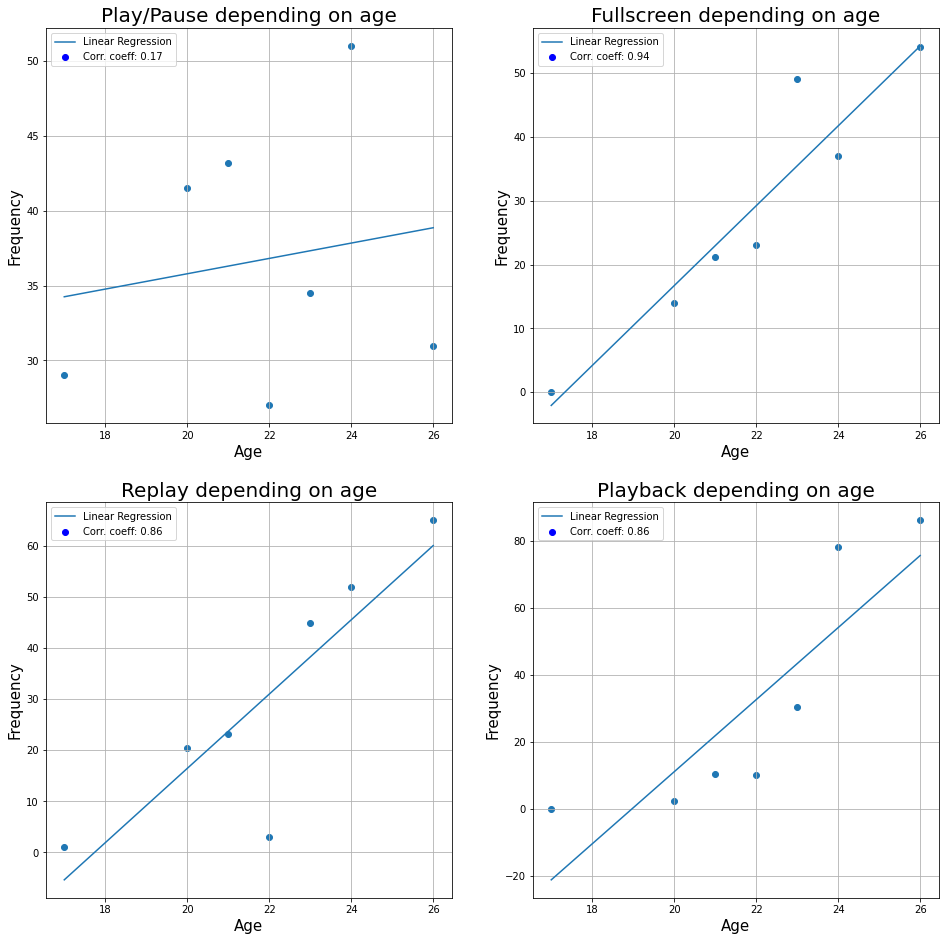

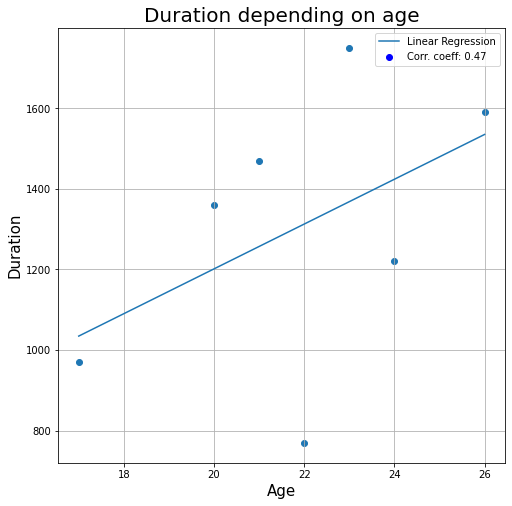

In [ ]:
user_id_age = []

#Sort users into different age groups
for i in range(17,27):
  tmp = userdata_final.loc[userdata_final.Age == i].UserID.to_numpy()
  user_id_age.append(tmp)
  age.append(i)

#Generate dataframes based on the age groups
age_17 = classification.loc[classification.UserID.isin(user_id_age[0])]
age_20 = classification.loc[classification.UserID.isin(user_id_age[3])]
age_21 = classification.loc[classification.UserID.isin(user_id_age[4])]
age_22 = classification.loc[classification.UserID.isin(user_id_age[5])]
age_23 = classification.loc[classification.UserID.isin(user_id_age[6])]
age_24 = classification.loc[classification.UserID.isin(user_id_age[7])]
age_26 = classification.loc[classification.UserID.isin(user_id_age[9])]

#Varaible initialization
play_pause = []
duration = []
fullscreen = []
replay = []
playback = []

var_list = [age_17,age_20,age_21,age_22,age_23,age_24,age_26]

#Calculate average values per age group
for e in var_list:
  length = e.UserID.nunique()
  play_pause.append(np.sum(e.Play_Pause.to_numpy())/length)
  duration.append(np.sum(e.Duration.to_numpy())/length)
  fullscreen.append(np.sum(e.Fullscreen.to_numpy())/length)
  replay.append(np.sum(e.Replay.to_numpy())/length)
  playback.append(np.sum(e.Playback.to_numpy())/length)


ages = [17,20,21,22,23,24,26]


fig, axs = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(16)

#Plot for Play/Pause frequency depending on age
b,a,r,p,std = stats.linregress(ages, play_pause)
x = np.arange(np.amin(ages), np.amax(ages)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(ages, play_pause, 2))
all_pears_corr = stats.pearsonr(ages, play_pause)
axs[0,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,0].plot(x, lin_reg, label = "Linear Regression")
axs[0,0].set_title("Play/Pause depending on age", fontsize = 20)
axs[0,0].set_ylabel("Frequency", fontsize = 15)
axs[0,0].set_xlabel("Age", fontsize = 15)
axs[0,0].scatter(ages, play_pause)
axs[0,0].legend()
axs[0,0].grid()

#Plot for fullscreen frequency depending on age
b,a,r,p,std = stats.linregress(ages, fullscreen)
x = np.arange(np.amin(ages), np.amax(ages)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(ages, fullscreen, 2))
all_pears_corr = stats.pearsonr(ages, fullscreen)
axs[0,1].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[0,1].plot(x, lin_reg, label = "Linear Regression")
axs[0,1].set_title("Fullscreen depending on age", fontsize = 20)
axs[0,1].set_ylabel("Frequency", fontsize = 15)
axs[0,1].set_xlabel("Age", fontsize = 15)
axs[0,1].scatter(ages, fullscreen)
axs[0,1].legend()
axs[0,1].grid()

#Plot for replay frequency depending on age
b,a,r,p,std = stats.linregress(ages, replay)
x = np.arange(np.amin(ages), np.amax(ages)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(ages, replay, 2))
all_pears_corr = stats.pearsonr(ages, replay)
axs[1,0].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[1,0].plot(x, lin_reg, label = "Linear Regression")
axs[1,0].set_title("Replay depending on age", fontsize = 20)
axs[1,0].set_ylabel("Frequency", fontsize = 15)
axs[1,0].set_xlabel("Age", fontsize = 15)
axs[1,0].scatter(ages, replay)
axs[1,0].legend()
axs[1,0].grid()

#Plot for playback frequency depending on age
b,a,r,p,std = stats.linregress(ages, playback)
x = np.arange(np.amin(ages), np.amax(ages)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(ages, playback, 2))
all_pears_corr = stats.pearsonr(ages, playback)
axs[1,1].scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs[1,1].plot(x, lin_reg, label = "Linear Regression")
axs[1,1].set_title("Playback depending on age", fontsize = 20)
axs[1,1].set_ylabel("Frequency", fontsize = 15)
axs[1,1].set_xlabel("Age", fontsize = 15)
axs[1,1].scatter(ages, playback)
axs[1,1].legend()
axs[1,1].grid()

#Plot for duration depending on age
fig, axs = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(8)
axs.set_title("Duration depending on age", fontsize=20)
axs.set_ylabel("Duration", fontsize = 15)
axs.set_xlabel("Age", fontsize = 15)
b,a,r,p,std = stats.linregress(ages, duration)
x = np.arange(np.amin(ages), np.amax(ages)+1)
lin_reg = [e*b+a for e in x]
polyreg = np.poly1d(np.polyfit(ages, duration, 2))
all_pears_corr = stats.pearsonr(ages, duration)
axs.scatter([],[],label = "Corr. coeff: " + "{:.2}".format(all_pears_corr[0]), color = "blue")
axs.plot(x, lin_reg, label = "Linear Regression")
axs.grid()
axs.scatter(ages,duration)
axs.legend()

# **Feedback vs No-Feedback**

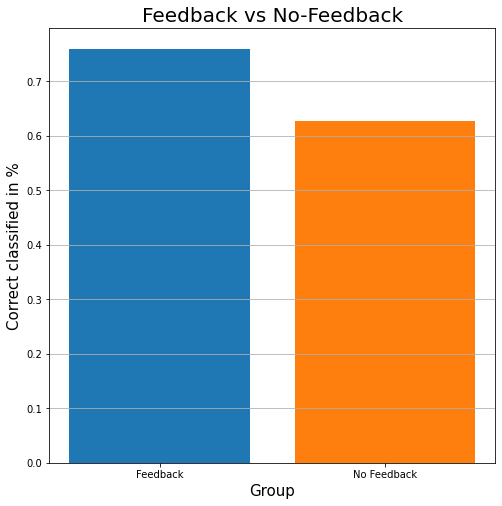

In [ ]:
#Generate dataframe depending on group id
feedback = userdata_final.loc[userdata_final.GroupID == 1]
no_feedback = userdata_final.loc[userdata_final.GroupID == 2]

feedback_rate = []
no_feedback_rate = []

#Calculate classification rate in feedback group
for x in feedback.UserID:
  classified_videos = classification.loc[classification.UserID == x]
  correct_classified = sum(np.where(classified_videos.Label == classified_videos.Category, True, False))
  correct_rate = (correct_classified/classified_videos.Video.count())
  feedback_rate.append(correct_rate)

#Calculate classification rate in no feedback group
for x in no_feedback.UserID:
  classified_videos = classification.loc[classification.UserID == x]
  correct_classified = sum(np.where(classified_videos.Label == classified_videos.Category, True, False))
  correct_rate = (correct_classified/classified_videos.Video.count())
  no_feedback_rate.append(correct_rate)

#Plot for feedback vs no feedback group
plt.figure(figsize=[8,8])
plt.bar(1,sum(feedback_rate)/len(feedback_rate))
plt.bar(2,sum(no_feedback_rate)/len(no_feedback_rate))
plt.xlabel("Group", fontsize=15)
plt.ylabel("Correct classified in %", fontsize=15)
plt.title("Feedback vs No-Feedback", fontsize=20)
plt.grid(axis = "y")
_ = plt.xticks([1,2], labels=["Feedback", "No Feedback"])

# **Video analysation**

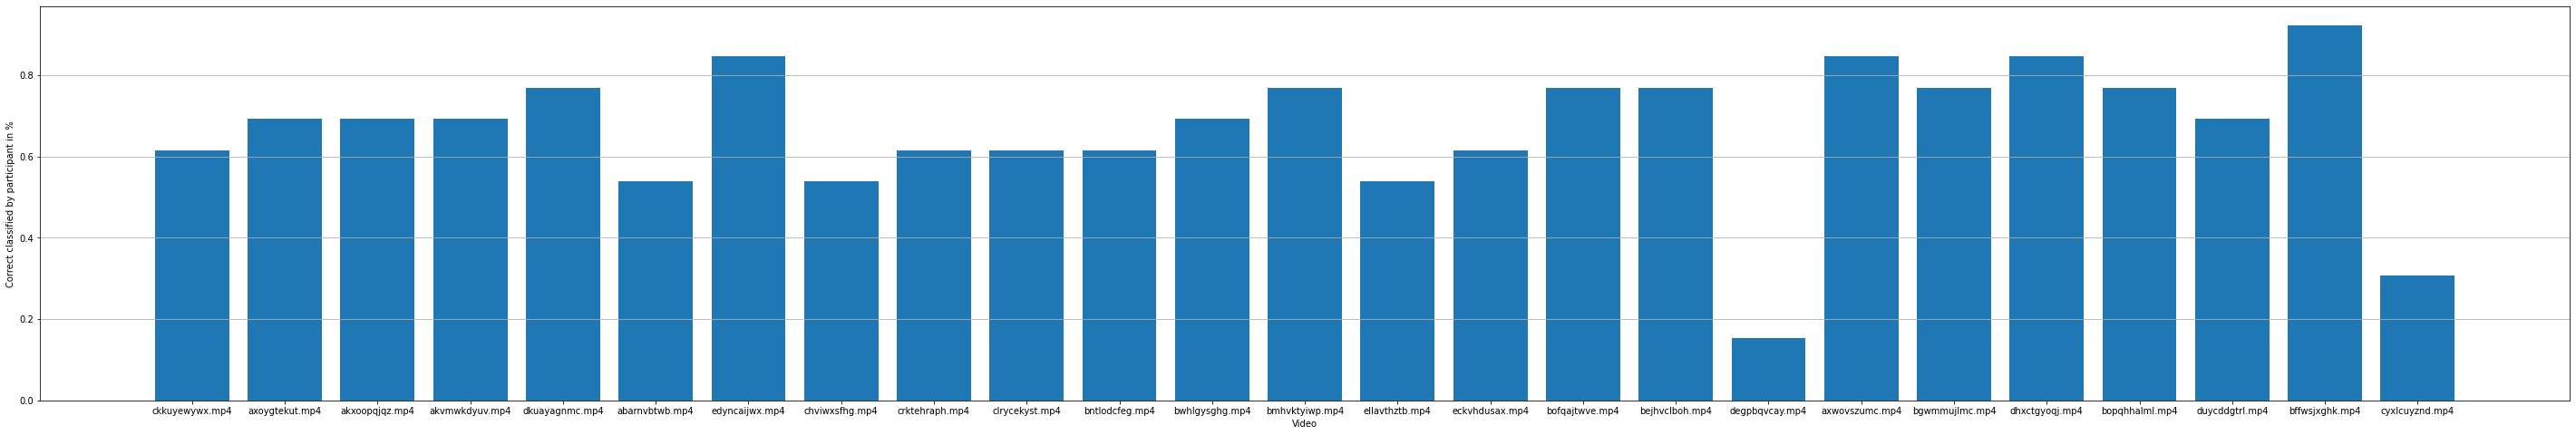

In [ ]:
correct_video = []
video_name = []

#Filter for classification dataset evaluated by the chosen participants
final_classification = classification.loc[classification.UserID.isin(final_user)]

#Calculate correct classified by participant in %
for x in final_classification.Video.unique():
  tmp = final_classification.loc[final_classification.Video == x]
  category = tmp.Category.to_numpy()
  label = tmp.Label.to_numpy()
  equal = np.where(category == label, True, False)
  video_name.append(x)
  correct_video.append(sum(equal)/len(equal))

#Plot for classification rate of video
plt.figure(figsize=[50,8])
plt.bar(range(1,26), correct_video)
plt.xticks(range(1,26,1), labels = video_name)
plt.grid(axis = "y")
plt.ylabel("Correct classified by participant in %")
plt.xlabel("Video")
print()